# Rossmann Sales Prediction

## Exploratory Data Analysis (EDA)

This step of the project was created to formulate thoughts about the data and its potential relationships to guide the data exploration and analysis.

**It is conducted as follows:**

- **Background Research:** a background research on the problem domain and dataset. This research can involve reading relevant literature, talking to domain experts, and understanding the context in which the data was collected.

- **Hypotheses**: Brainstorm hypotheses organizing them based on themes or areas of interest.

- **Prioritize Hypotheses**: This is when we formulate a final list of hypotheses based on their potential impact, feasibility to test, and relevance to the project goals. We consider which hypotheses are critical to achieving our project objectives and which are more exploratory or speculative.

#### Stores Hypotheses

- **H1:** Stores with more employees should sell more.
- **H2:** Stores with greater inventory capacity should sell more.
- **H3:** Larger stores should sell more.
- **H4:** Stores with greater assortments should sell more.
- **H5:** Stores with closer competitors should sell less.
- **H6:** Stores with competitors for longer should sell more.

#### Products Hypotheses

- **H1:** Stores investing more in Marketing should sell more.
- **H2:** Stores with greater product exposure should sell more.
- **H3:** Stores with products at a lower price should sell more.
- **H5:** Stores with more aggressive promotions (bigger discounts) should sell more.
- **H6:** Stores with promotions active for a longer period of time should sell more.
- **H7:** Stores with more promotion days should sell more.
- **H8:** Stores with more promotions in a row should sell more.

#### Frequency and Time Hypotheses

- **H1:** Stores should sell more throughout the years.
- **H2:** Stores should sell more in the second half of the year.
- **H3:** Stores should sell more during the first week of each month when people receive their salaries.
- **H4:** Stores should sell more on weekends.
- **H5:** Stores should sell less during school holidays.
- **H6:** Stores sell more through the years and months.

#### Final Hypotheses

This list has been compiled based on the variables available in the dataset, considering what can realistically be examined. To select the final hypotheses, it's crucial to evaluate whether there's enough data for their validation. The hypotheses that meet these requirements are as follows:

- **H1:** Stores with higher assortment level are supposed to sell more.
- **H2:** Stores with higher number of nearby competitors are supposed to sell less.
- **H3:** Stores with competitors for a longer period of time sell more.
- **H4:** Stores that keep promotions for longer periods are supposed to sell more.
- **H5:** Stores that participate in more consecutive promotions are supposed to sell more.
- **H6:** Stores open on Christmas sell more than other days on average. 
- **H7:** Stores are supposed to sell more before the 15th day of each month.
- **H8:** Stores are supposed to sell less during the weekend on average.
- **H9:** Stores are supposed to sell less during school holidays.
- **H10:** Stores sell more through the years and months.

## 0. Imports

### 0.1. Libraries

In [1]:
### Data Manipulation
import pandas                   as pd
import numpy                    as np

### Data Visualization
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import matplotlib.dates         as mdates

### Other Libraries
import inflection
import datetime 
import warnings
import random

### 0.2. Settings

In [2]:
### Ignoring warnings
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['figure.titlesize']    = 24
mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

### 0.3. Functions

In [3]:
# Visualization functions
def set_plot(fig, title, xlabel, ylabel):
    """
    Summary: This function sets the plot configuration for the initial plots. 
    Args:
        fig: the figure object.
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
    Returns: figure with the image configuration.
    """
    # Customizing
    fig.set_title(title)
    fig.set_xlabel(xlabel, color='black')
    fig.set_ylabel(ylabel, color='black')
    fig.tick_params(left=False, bottom=False)

    return fig

def set_image(fig, title, xlabel, ylabel, xrotation=0, yrotation=0):
    """
    Summary: This function sets the image configuration for a Matplotlib plot.
    Args:
        fig: the figure object.
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.
    Returns: figure with the image configuration.
    """
    # Customizing
    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=xrotation)
    plt.yticks(rotation=yrotation)
    plt.tick_params(left=False, bottom=False)

    return fig

def hist(dataframe, feature, title=None, xlabel=None, ylabel=None):
    """
    Summary: this function plots a Seaborn histogram with its configuration set.
    Args:
        dataframe: the dataframe.
        feature: the feature to be analyzed.
        title: the title of the plot. Default as None.
        xlabel: the label for the x axis. Default as None.
        ylabel: the label for the y axis. Default as None.
    Return: histogram with the image configuration.
    """
    fig = sns.histplot(dataframe[feature])

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.tick_params(left=False, bottom=False)

    return fig

def box(dataframe, xfeature, yfeature, title=None, xlabel=None, ylabel=None):
    """
    Summary: this function plots a Seaborn boxplot with its configuration set.
    Args:
        dataframe: the dataframe.
        xfeature: the feature to be analyzed on the x axis.
        yfeature: the feature to be analyzed on the y axis.
        title: the title of the plot. Default as None.
        xlabel: the label for the x axis. Default as None.
        ylabel: the label for the y axis. Default as None.
    Return: boxplot with the image configuration.
    """
    fig = sns.boxplot(data = dataframe, x=xfeature, y=yfeature)

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.tick_params(left=False, bottom=False)

    return fig

def kde(dataframe, feature, hue_feature=None, title=None, xlabel=None, ylabel=None):
    """
    Summary: this function plots a Seaborn kdeplot with its configuration set.
    Args:
        dataframe: the dataframe.
        feature: the feature to be analyzed.
        hue_feature: the feature to be analyzed by color. Default as None.
        title: the title of the plot. Default as None.
        xlabel: the label for the x axis. Default as None.
        ylabel: the label for the y axis. Default as None.
    Return: kdeplot with the image configuration.
    """
    fig = sns.kdeplot(data=dataframe, x=feature, hue=hue_feature, shade=True)

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.tick_params(left=False, bottom=False)
    
    if hue_feature:
        legend = fig.get_legend()
        legend.set_title(None)

    return fig

def bar(dataframe, xfeature, yfeature, title=None, xlabel=None, ylabel=None, hue_feature=None):
    """
    Summary: this function plots a *Seaborn* barplot with its configuration set.
    Args:
        dataframe: the dataframe.
        xfeature: the feature to be analyzed on the x axis.
        yfeature: the feature to be analyzed on the y axis.
        title: the title of the plot. Default as None.
        xlabel: the label for the x axis. Default as None.
        ylabel: the label for the y axis. Default as None.
        hue_feature: the feature to be analyzed by color. Default as None.
    Return: barplot with the image configuration.
    """
    # Plot
    fig = sns.barplot(data=dataframe, x=xfeature, y=yfeature, hue=hue_feature)

    # Customizing
    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.tick_params(left=False, bottom=False)

    return fig

def barplot(dataframe, xfeature, yfeature, title=None, xlabel=None, ylabel=None):
    """
    Summary: this function plots a *Pyplot* barplot with its configuration set.
    Args:
        dataframe: the dataframe.
        xfeature: the feature to be analyzed on the x axis.
        yfeature: the feature to be analyzed on the y axis.
        title: the title of the plot. Default as None.
        xlabel: the label for the x axis. Default as None.
        ylabel: the label for the y axis. Default as None.
    Return: barplot with the image configuration.
    """
    fig = plt.bar(dataframe[xfeature], dataframe[yfeature])

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.tick_params(left=False, bottom=False)

    return fig

def reg(dataframe, xfeature, yfeature, title=None, xlabel=None, ylabel=None):
    """
    Summary: this function plots a Seaborn regplot with its configuration set.
    Args:
        dataframe: the dataframe.
        xfeature: the feature to be analyzed on the x axis.
        yfeature: the feature to be analyzed on the y axis.
        title: the title of the plot. Default as None.
        xlabel: the label for the x axis. Default as None.
        ylabel: the label for the y axis. Default as None.
    Return: regplot with the image configuration.
    """
    fig = sns.regplot(data = dataframe, x=xfeature, y=yfeature)

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.tick_params(left=False, bottom=False)

    return fig

# Function to calculate statistics

def calculate_statistics(numerical_dataframe):
    """
    Summary: the function calculates the mean, std, min, percentiles [25%, 50% (median), 75%], max, range, skewness and kurtosis
    Args: the DataFrame we want to know more about.
    Return: a DataFrame with the statistics of the numerical variables.
    """
    # Calculating
    statistics = pd.DataFrame({
        'mean':     numerical_dataframe.mean(),
        'std':      numerical_dataframe.std(),
        'min':      numerical_dataframe.min(),
        'Q1':       numerical_dataframe.quantile(0.25),
        'median':   numerical_dataframe.median(),
        'Q3':       numerical_dataframe.quantile(0.75),
        'max':      numerical_dataframe.max(),
        'range':    numerical_dataframe.apply(lambda x: x.max()-x.min()),
        'skewness': numerical_dataframe.skew(),
        'kurtosis': numerical_dataframe.kurtosis()
    })

    return statistics

### 0.4. Dataset

In [4]:
# Importing pre-processed dataset
df = pd.read_parquet('../data/processed/preprocessed_dataset.parquet')

## 3. Exploratory Data Analysis

<div align="center">

| Column name | Description |
|---|---|
| `store` | Each store has its unique ID. |
| `day_of_week` | Day of the week on which the sale was made.  |
| `date` | The exact date on which the sale was made. |
| `sales` | The amount of sales in the store. |
| `customers` | The number of customers that have been to the store. |
| `open` | Whether the store is open or not. |
| `promo` | Indicates whether the store is on promotion or not. |
| `state_holiday` | Indicates which state holiday is it or if it is none. |
| `school_holiday` | Indicates whether it is a school holiday or not. |
| `store_type` | Informs what type of store it is. |
| `assortment` | Informs the level of assortment the store has. |
| `comp_distance` | Distance in meters to the nearest competition. |
| `promo2` | Indicates if the store is running a consecutive promotion. |
| `year` | The year of the date. |
| `month` | The month of the date. |
| `week` | Week of the year. |
| `day` | The day of the date. |
| `year_week` | Year and week of the date. |
| `comp_since` | Indicates the date when the nearest competition opened. |
| `comp_time_delta` | Indicates when the nearest competition opened in days. |
| `comp_time_month` | Indicates when the nearest competition opened in months. |
| `promo_since` | Indicates since when the promotion is running. |
| `promo_time_delta` | Indicates since when the promotion is running in days. |
| `promo_time_month` | Indicates since when the promotion is running in months. |

</div>

## 3.1. Univariate Analysis

### 3.1.1. Sales

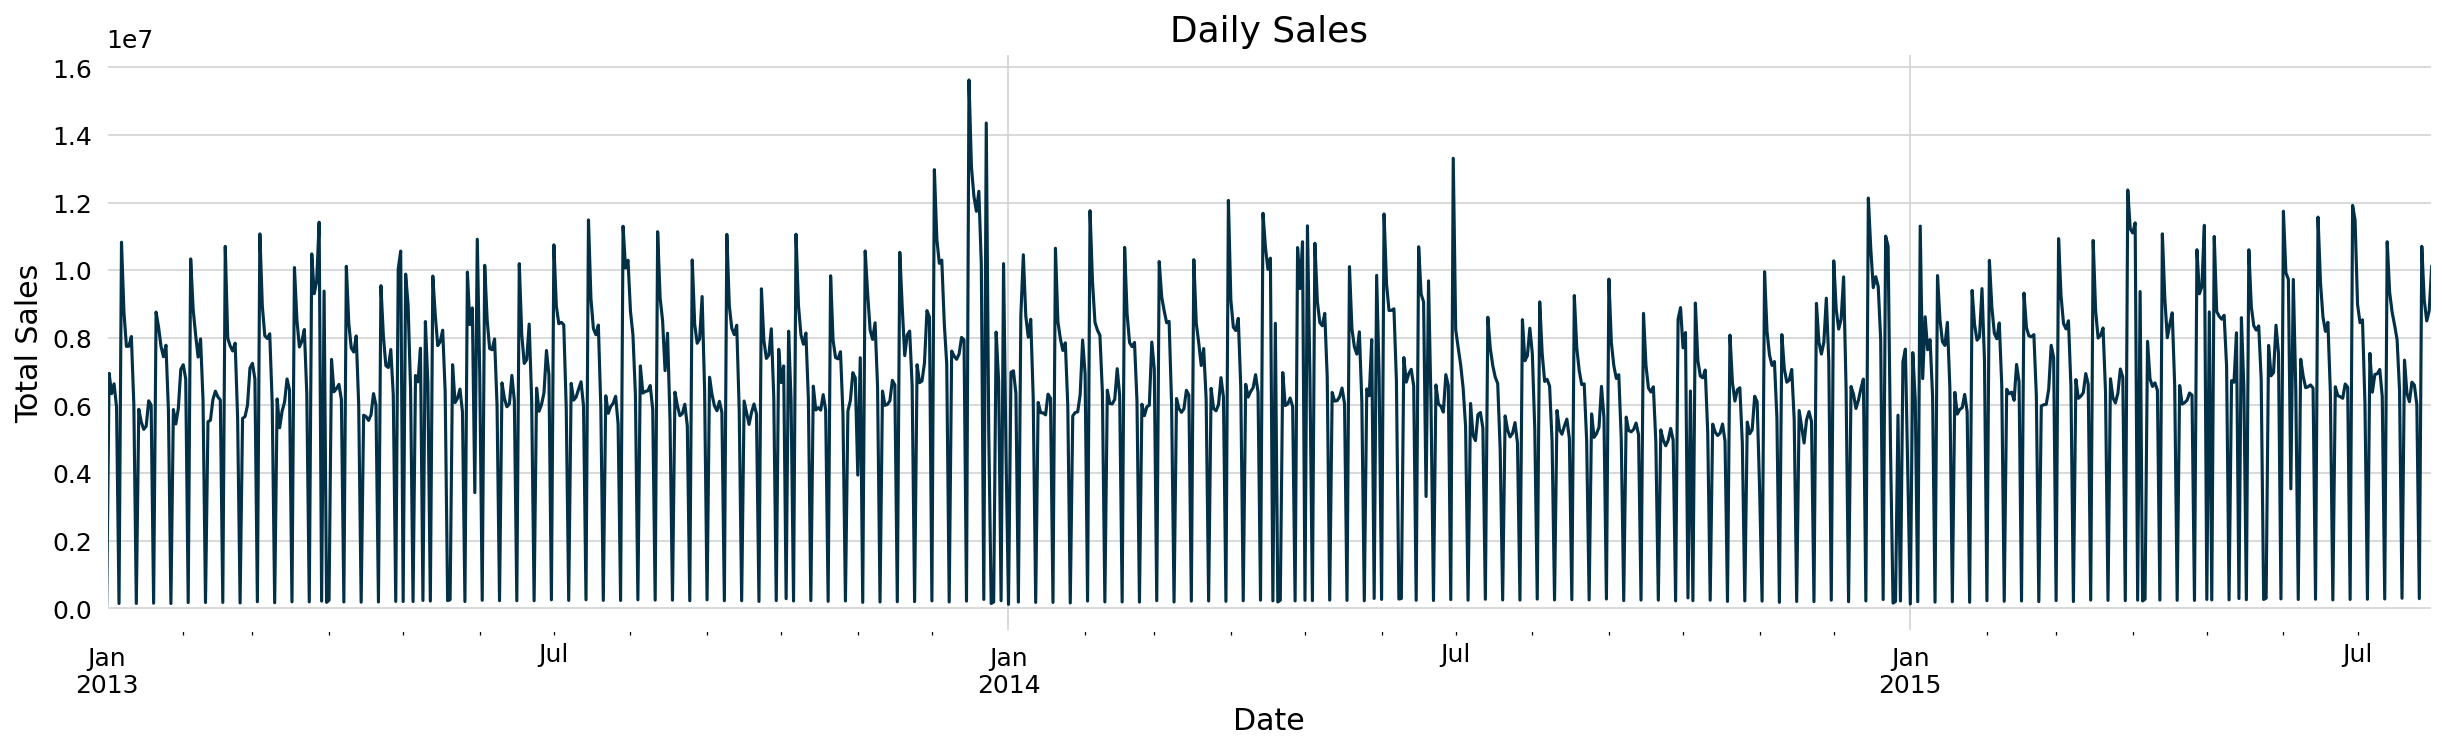

In [5]:
# Data Manipulation
df_sales = df[df['open'] == 1][['date', 'sales']].groupby(['date']).sum().reset_index()
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.set_index('date', inplace=True)

# Plot
fig = df_sales.plot(legend=False)
set_plot(fig, 'Daily Sales', 'Date', 'Total Sales');

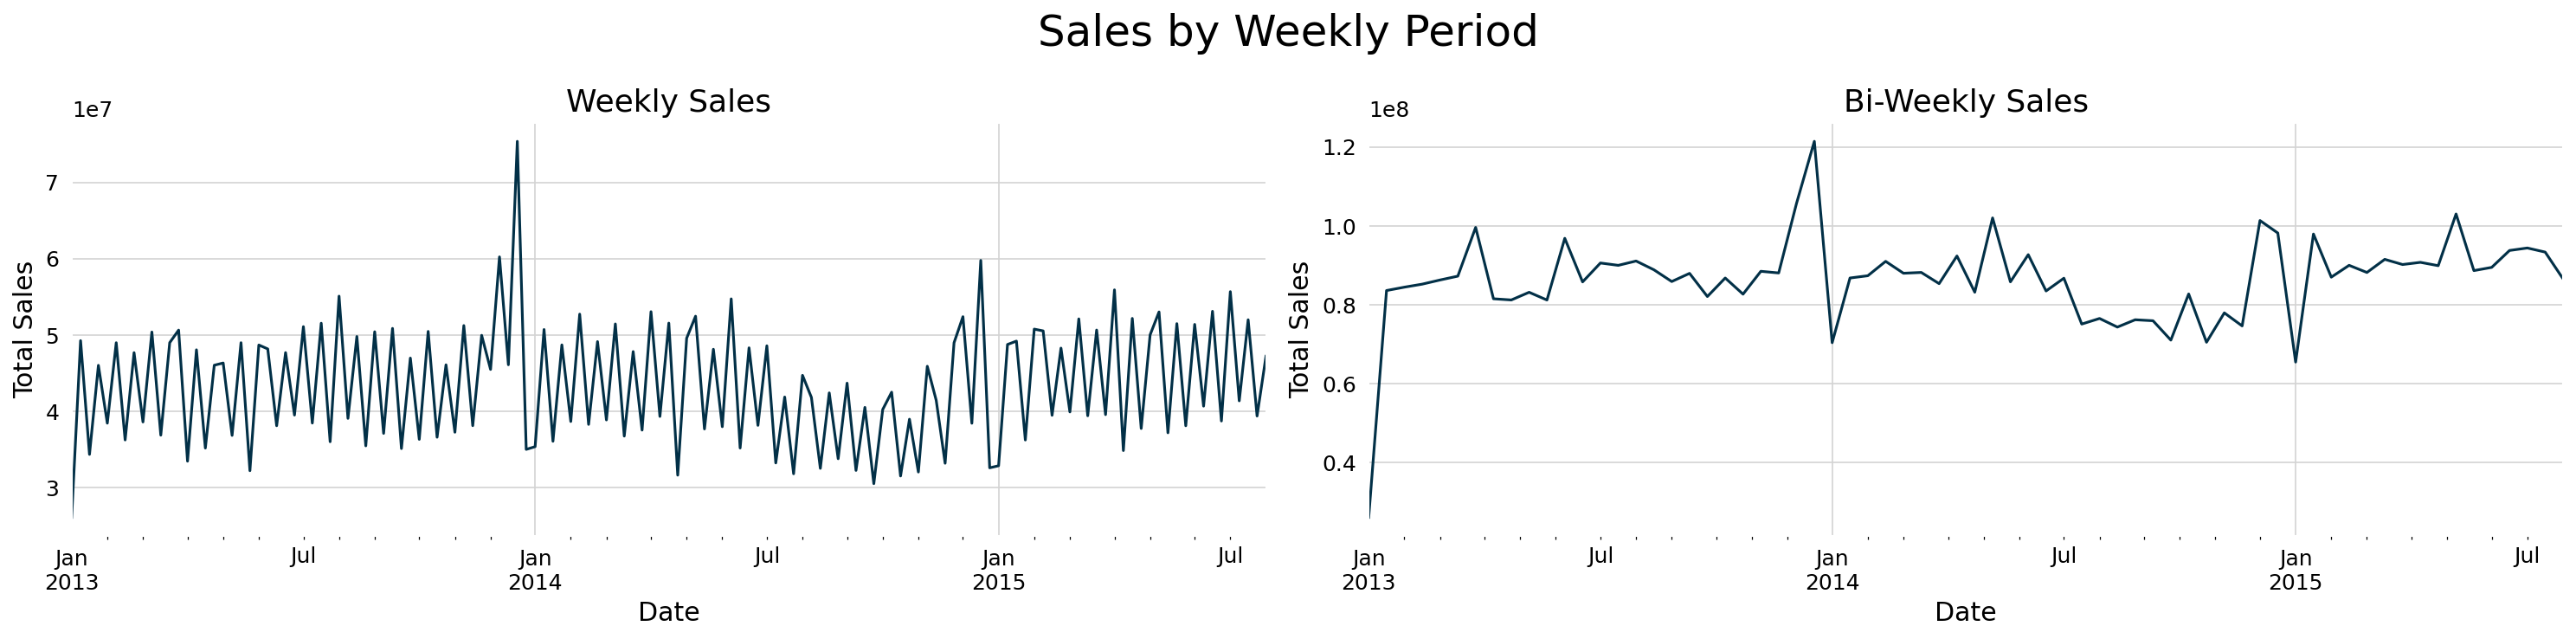

In [6]:
# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Title
fig.suptitle('Sales by Weekly Period')

# Plot 1
df_sales.resample('W').sum().plot(ax=ax1, legend=False)
set_plot(ax1, 'Weekly Sales', 'Date', 'Total Sales')

# Plot 2
df_sales.resample('2W').sum().plot(ax=ax2, legend=False)
set_plot(ax2, 'Bi-Weekly Sales', 'Date', 'Total Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

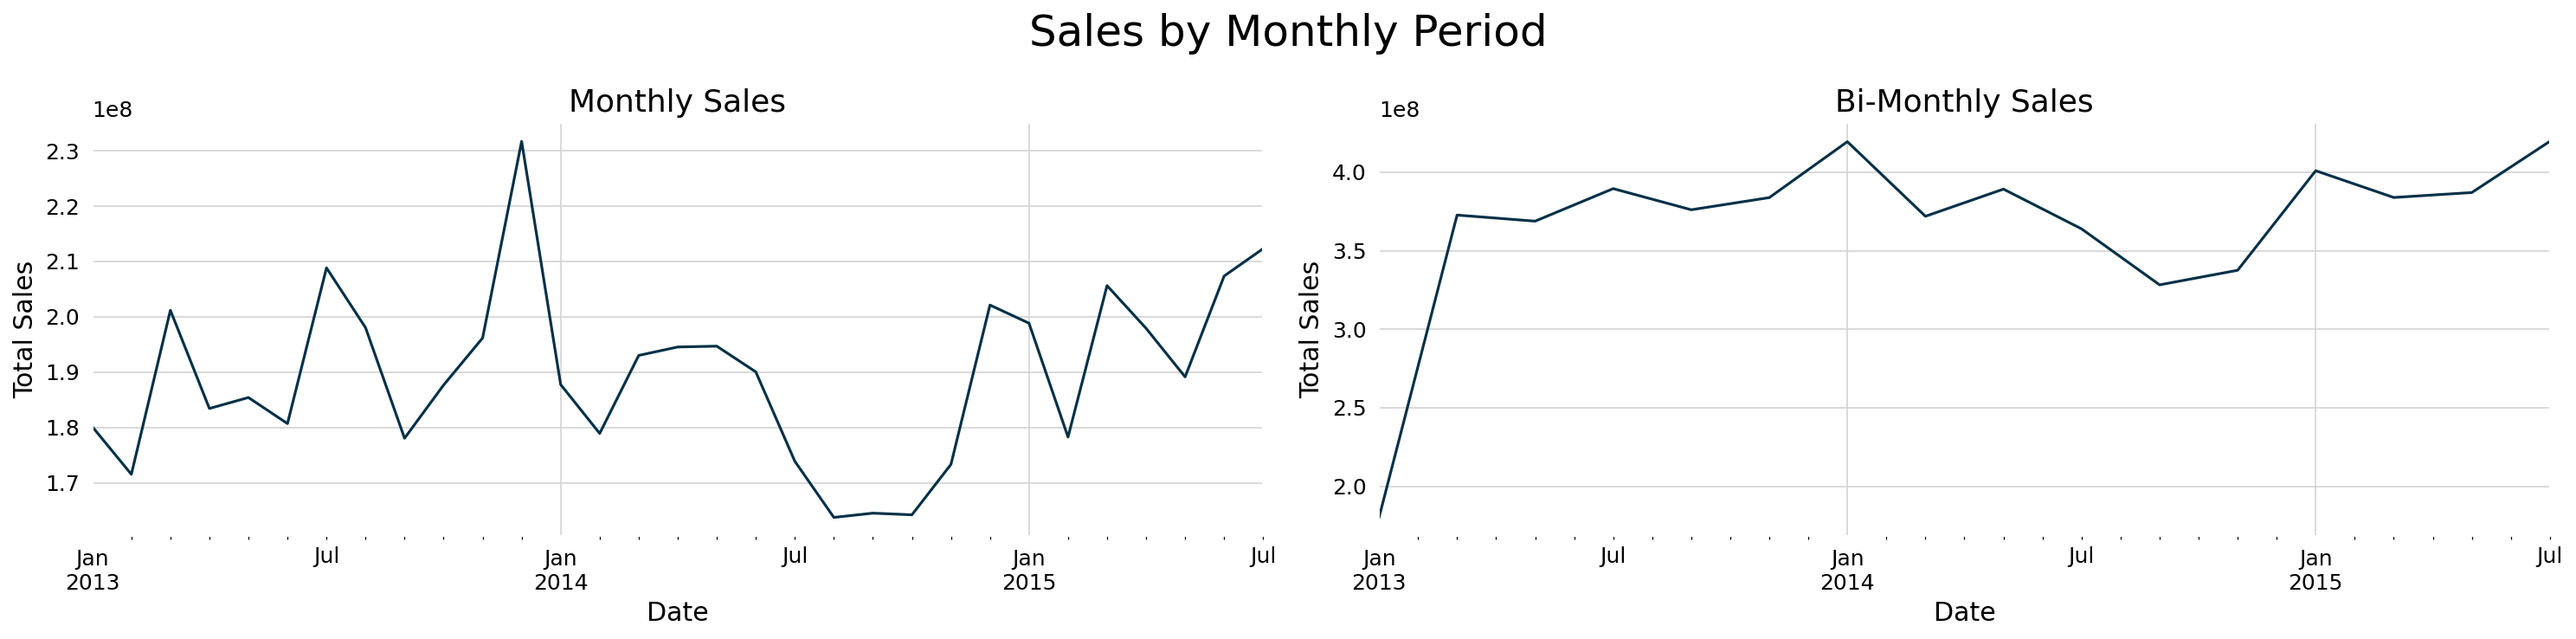

In [7]:
# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Title
fig.suptitle('Sales by Monthly Period')

# Plot 1
df_sales.resample('M').sum().plot(ax=ax1, legend=False)
set_plot(ax1, 'Monthly Sales', 'Date', 'Total Sales')

# Plot 2
df_sales.resample('2M').sum().plot(ax=ax2, legend=False)
set_plot(ax2, 'Bi-Monthly Sales', 'Date', 'Total Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 3.1.2. Histograms for numerical variables

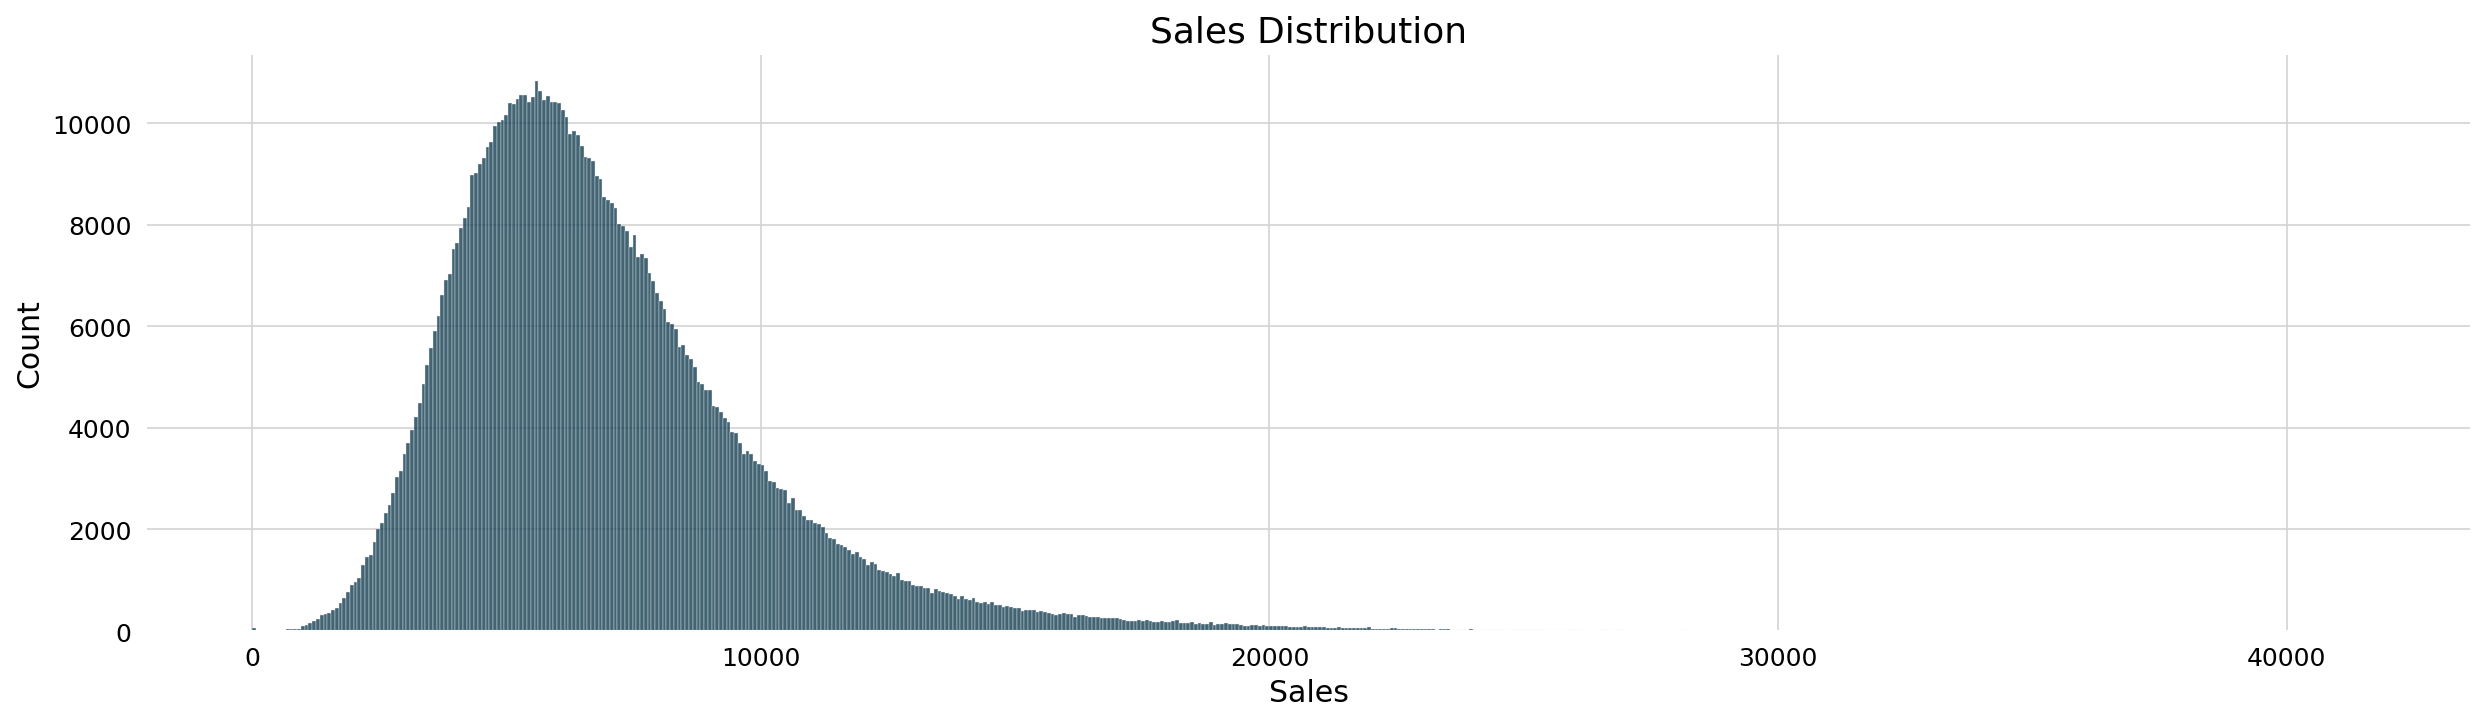

In [8]:
# Selecting only the stores that have an open status
aux = df[(df['open'] == 1)]

# Plot
hist(aux, 'sales', 'Sales Distribution', 'Sales', 'Count');

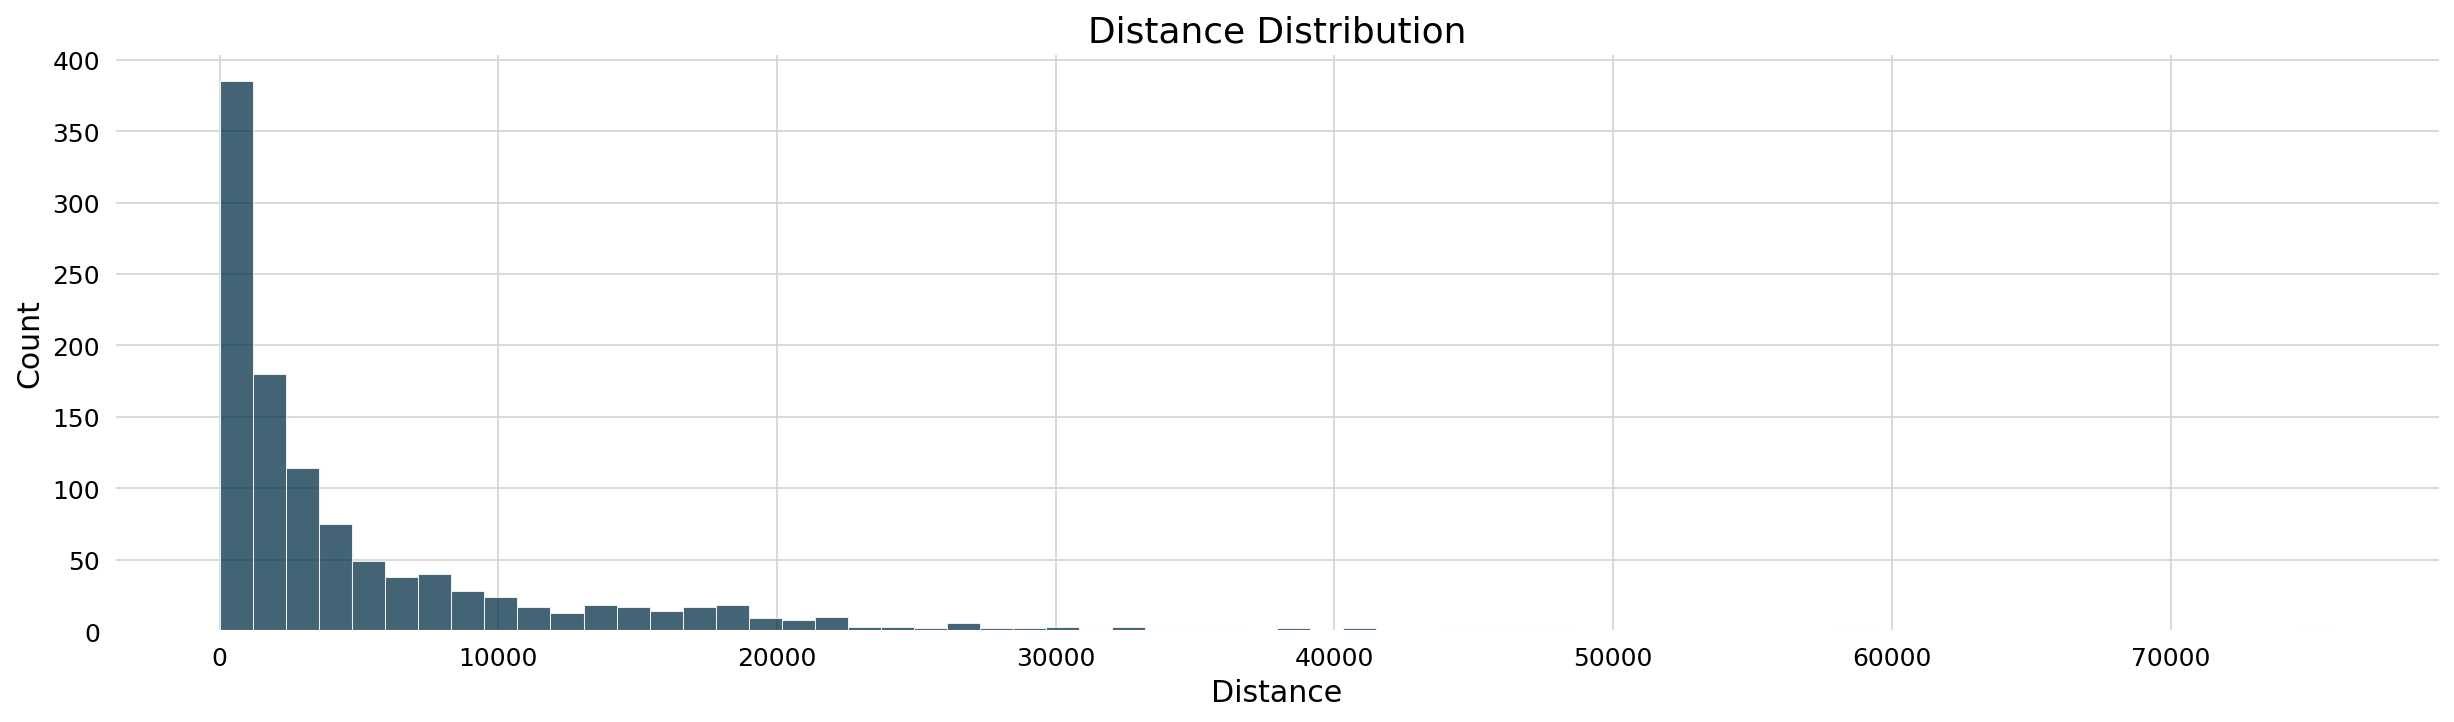

In [9]:
# Data manipulation
df_comp_distance = df[['store', 'comp_distance']].sort_values(by='store')
df_comp_distance = df_comp_distance.drop_duplicates('store', keep='first')

# Plot
hist(df_comp_distance, 'comp_distance', 'Distance Distribution', 'Distance', 'Count');

### 3.1.3.Categorical variables

<Axes: title={'center': 'Assortment Sales'}, xlabel='Assortment', ylabel='Sales'>

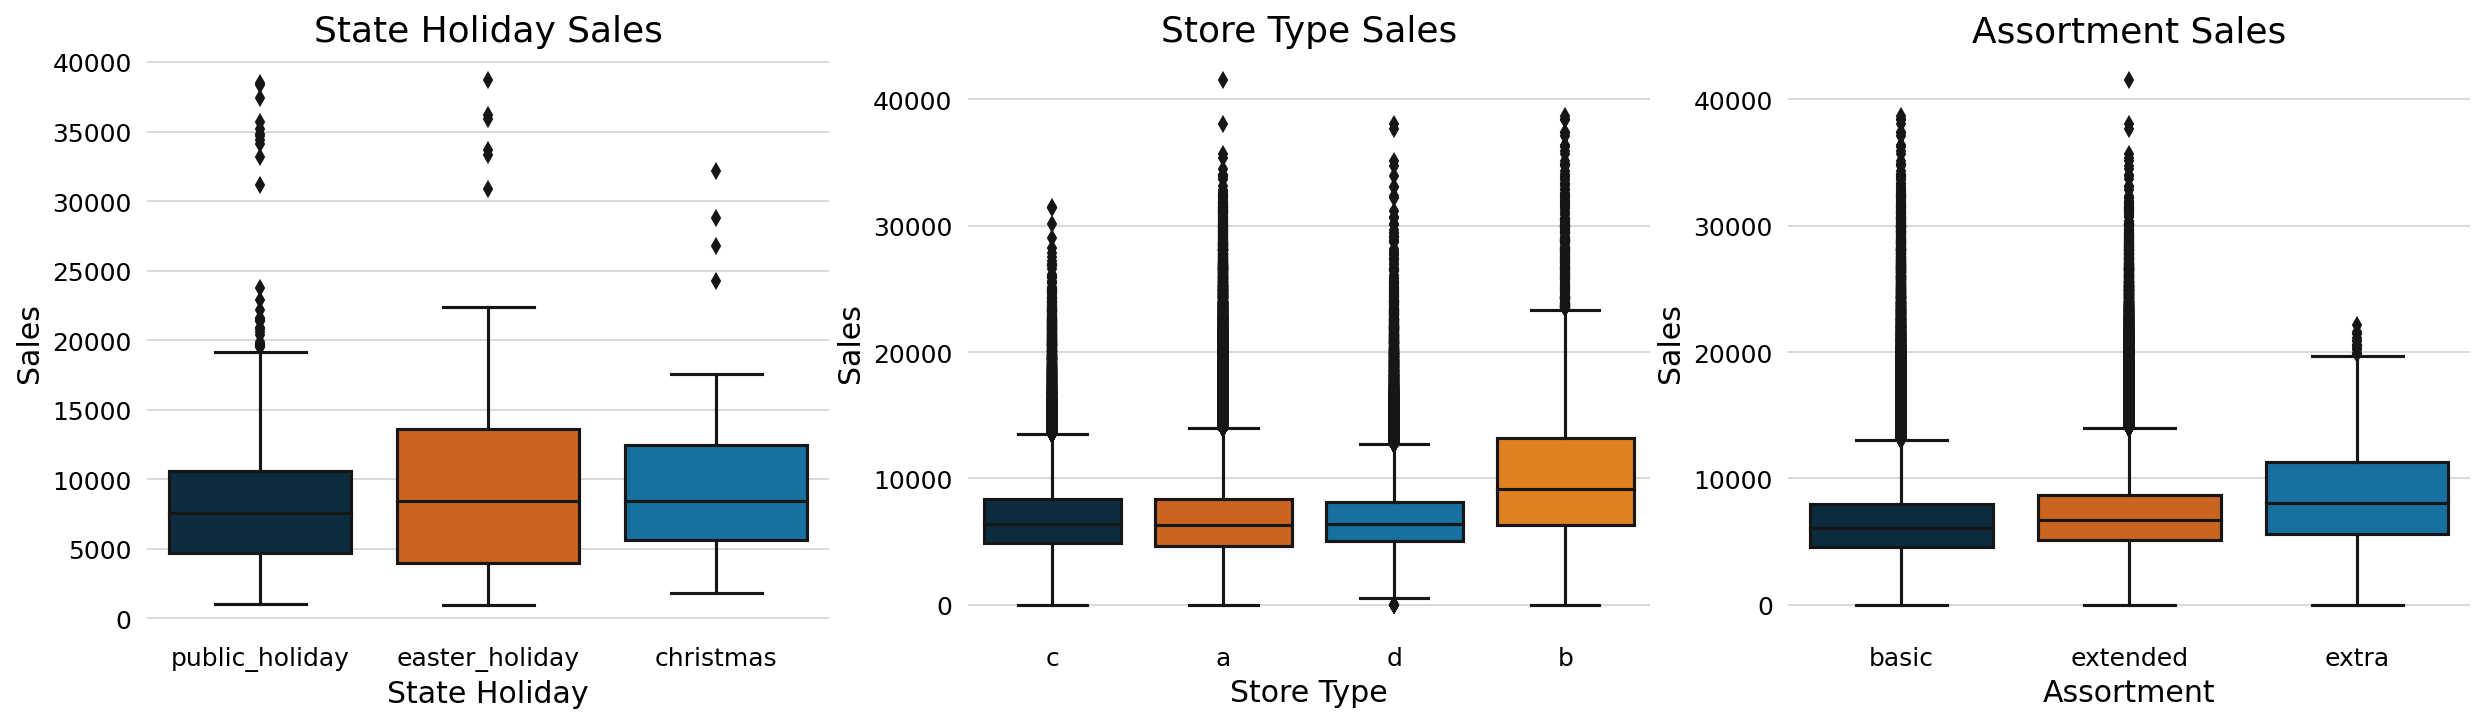

In [10]:
# Data manipulation
aux1 = df[df['open'] == 1]
aux2 = df[(df['open'] == 1) & (df['state_holiday'] != 'regular_day')]

# Plot
plt.subplot( 1, 3, 1 )
box(aux2, 'state_holiday', 'sales', 'State Holiday Sales', 'State Holiday', 'Sales')
plt.subplot( 1, 3, 2 )
box(aux1, 'store_type', 'sales', 'Store Type Sales', 'Store Type', 'Sales')
plt.subplot( 1, 3, 3 )
box(aux1, 'assortment', 'sales', 'Assortment Sales', 'Assortment', 'Sales')

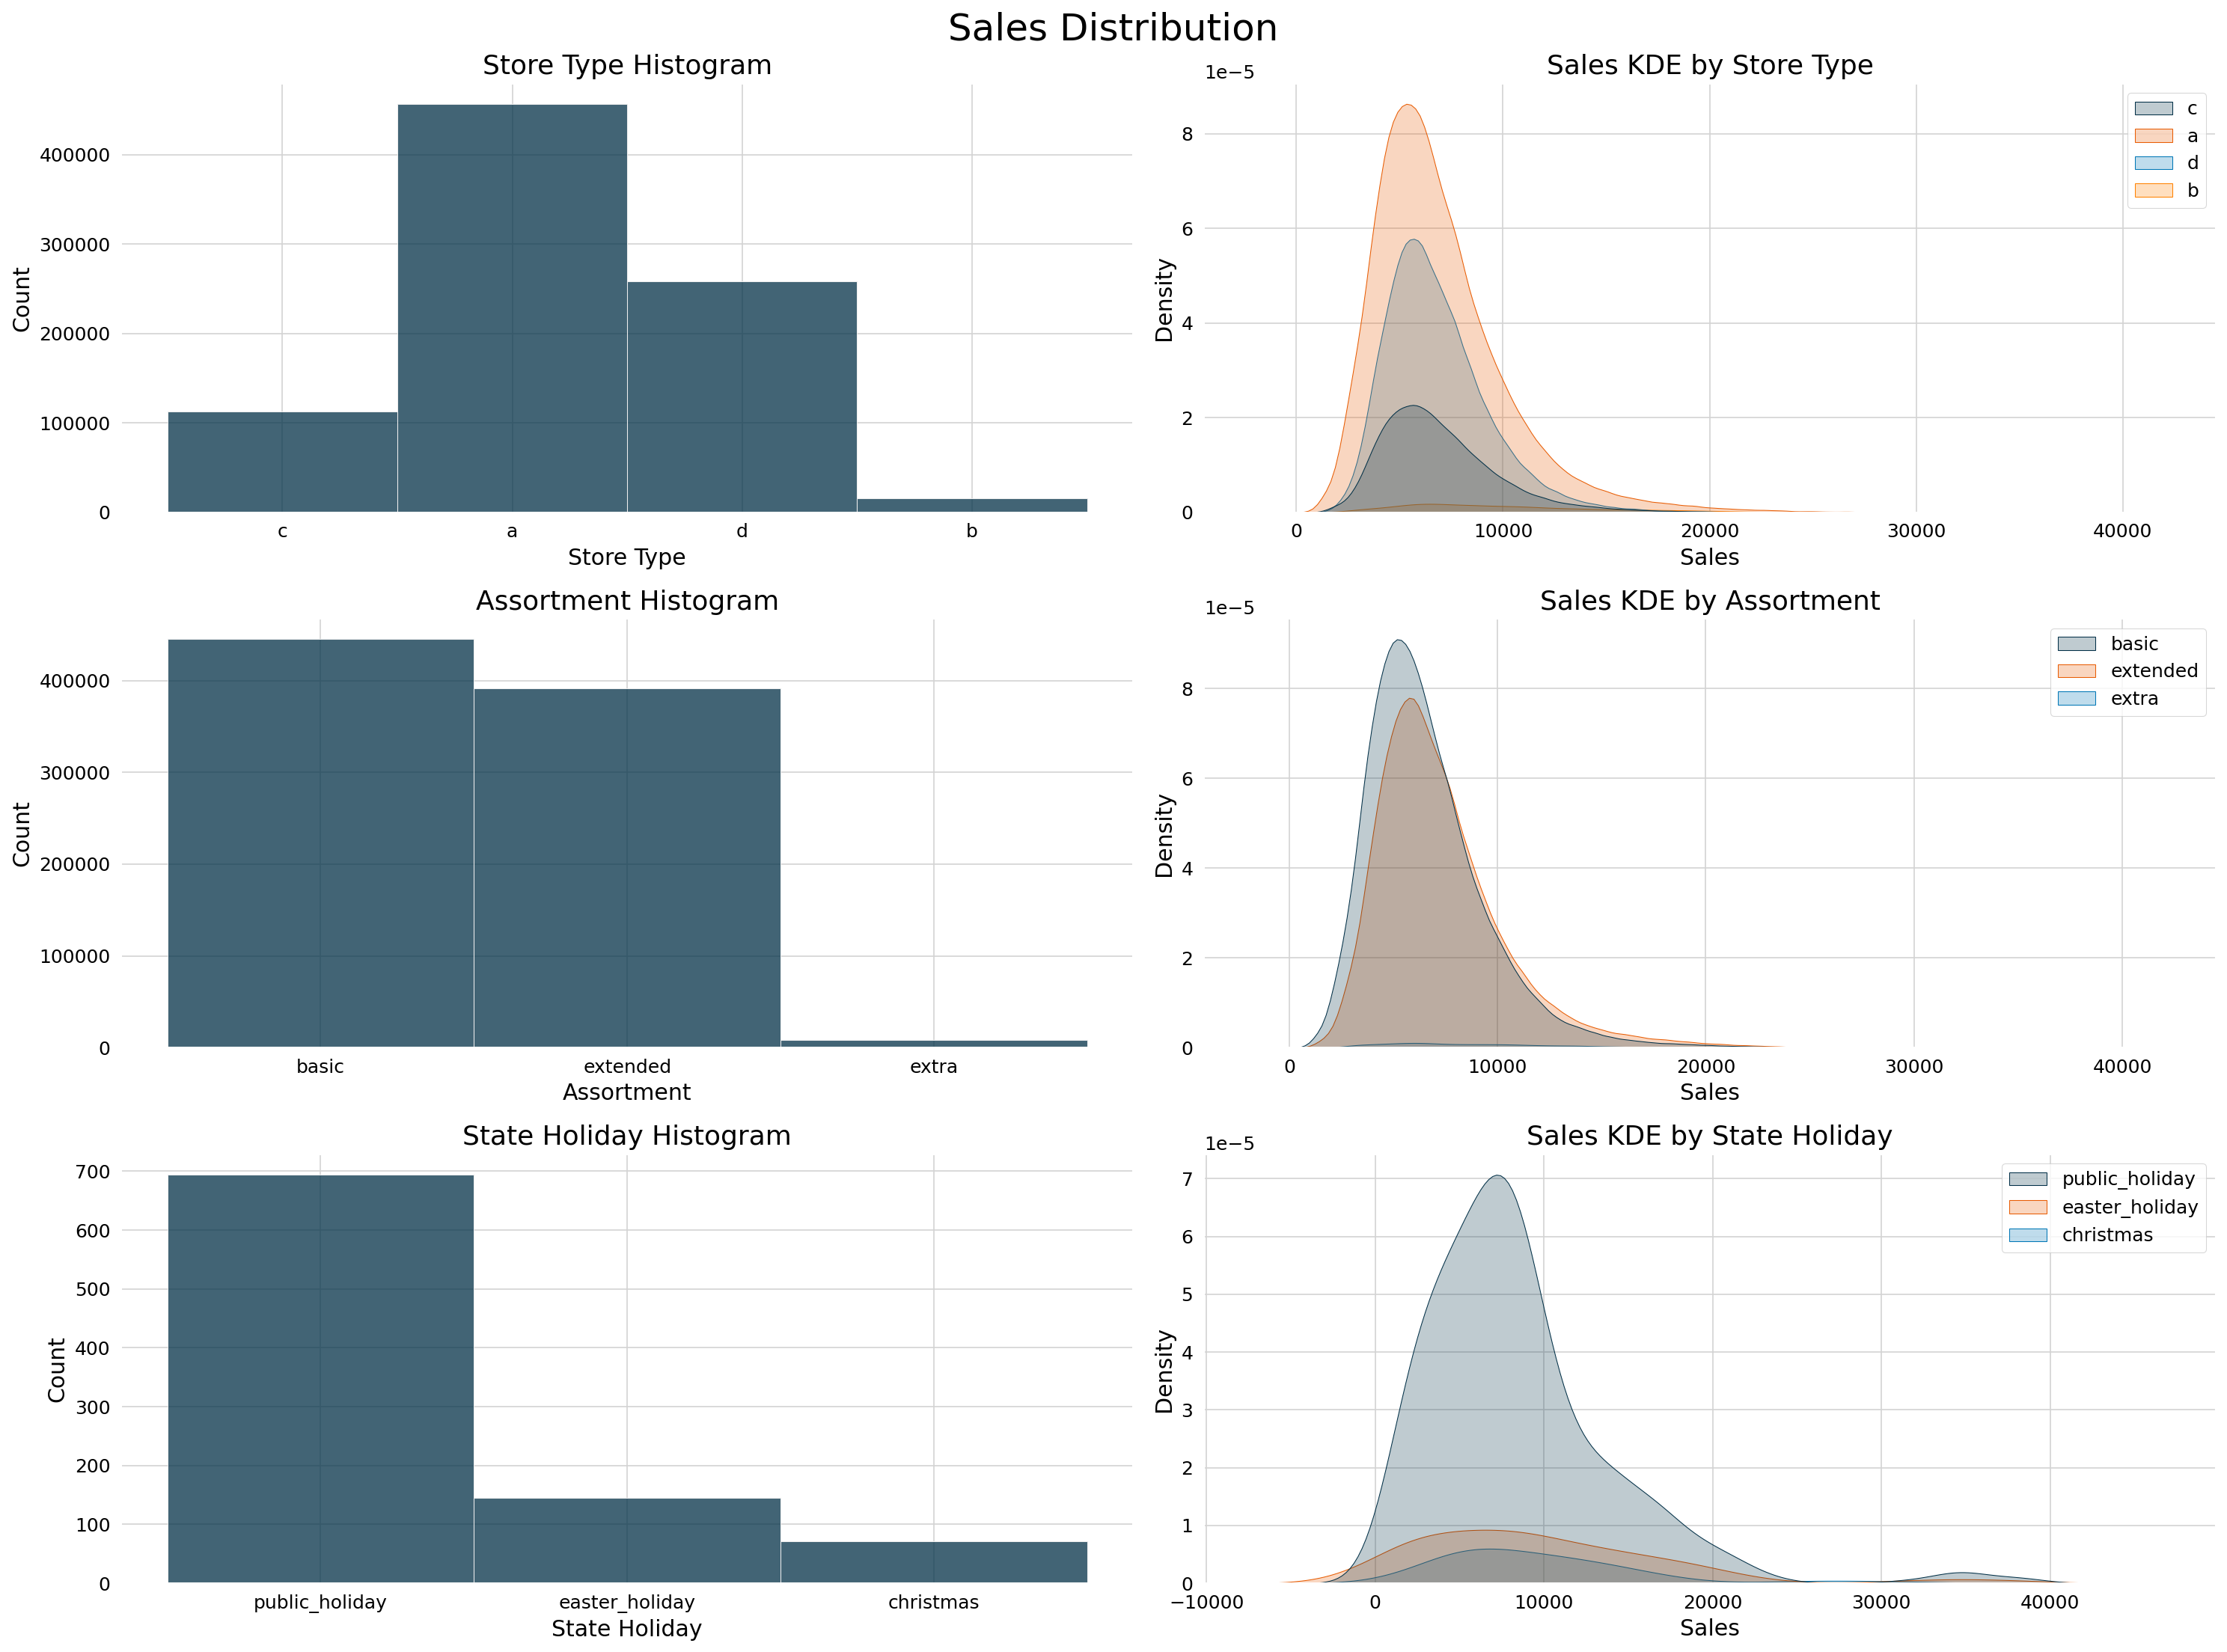

In [11]:
# Figure size
plt.figure(figsize=(20, 15))

# Setting main title
plt.suptitle('Sales Distribution')

# Data manipulation
aux  = df[df['open'] == 1]
aux2 = df[(df['open'] == 1) & (df['state_holiday'] != 'regular_day')]

# Plots
plt.subplot(3, 2, 1)
hist(aux, 'store_type', 'Store Type Histogram', 'Store Type', 'Count')
plt.subplot(3, 2, 2)
kde(aux, 'sales', 'store_type', 'Sales KDE by Store Type', 'Sales', 'Density')
plt.subplot(3, 2, 3)
hist(aux, 'assortment', 'Assortment Histogram', 'Assortment', 'Count')
plt.subplot(3, 2, 4)
kde(aux, 'sales', 'assortment', 'Sales KDE by Assortment', 'Sales', 'Density')
plt.subplot(3, 2, 5)
hist(aux2, 'state_holiday', 'State Holiday Histogram', 'State Holiday', 'Count')
plt.subplot(3, 2, 6)
kde(aux2, 'sales', 'state_holiday', 'Sales KDE by State Holiday', 'Sales', 'Density')

# Settings
plt.tight_layout()

## 3.2. Bivariate analysis

### Hypothesis Testing

### 3.2.1. **H1:** Stores with higher assortment level are supposed to sell more.

In [12]:
df_assortment = df[['store', 'assortment']].sort_values(by='store')
df_assortment = df_assortment.drop_duplicates('store', keep='first')
df_assortment.assortment.value_counts()

basic       593
extended    513
extra         9
Name: assortment, dtype: int64

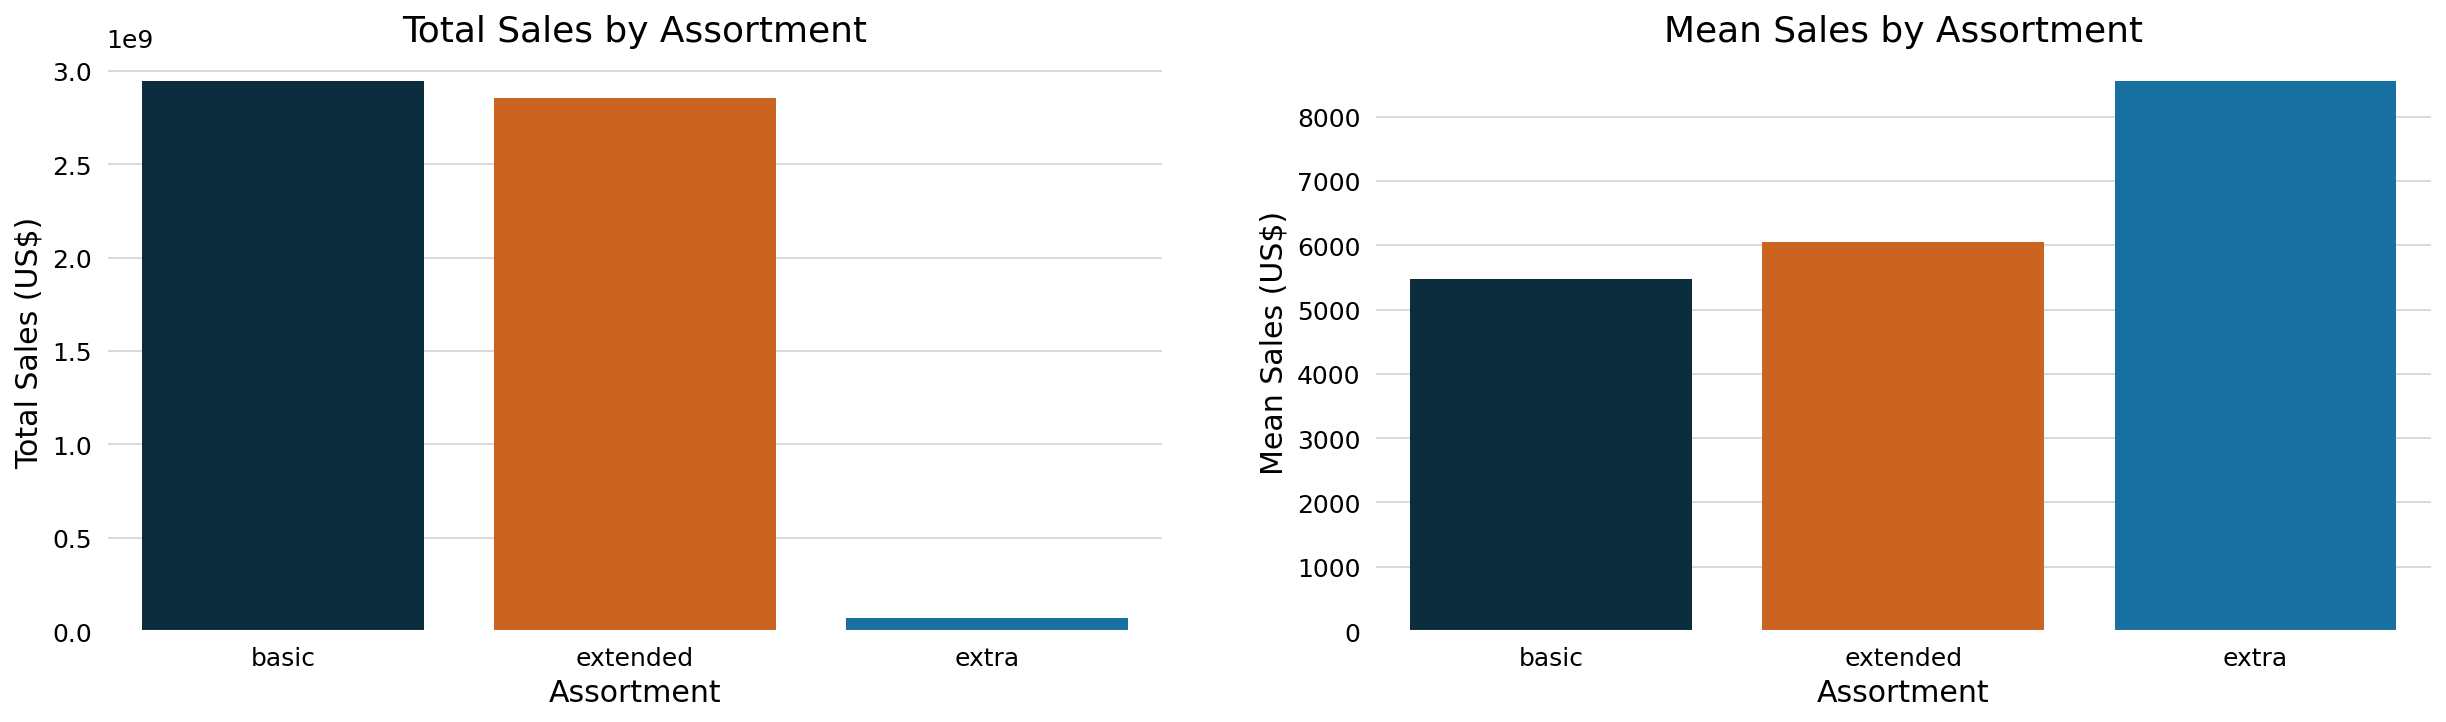

In [13]:
# Grouping Sales by Assortment Level
aux = df[['assortment', 'sales']].groupby(['assortment']).sum().reset_index()
aux2 = df[['assortment', 'sales']].groupby(['assortment']).mean().reset_index()

# Plotting
plt.subplot(1, 2, 1)
bar(aux, 'assortment', 'sales', 'Total Sales by Assortment', 'Assortment', 'Total Sales (US$)')

plt.subplot(1, 2, 2)
bar(aux2, 'assortment', 'sales', 'Mean Sales by Assortment', 'Assortment', 'Mean Sales (US$)');

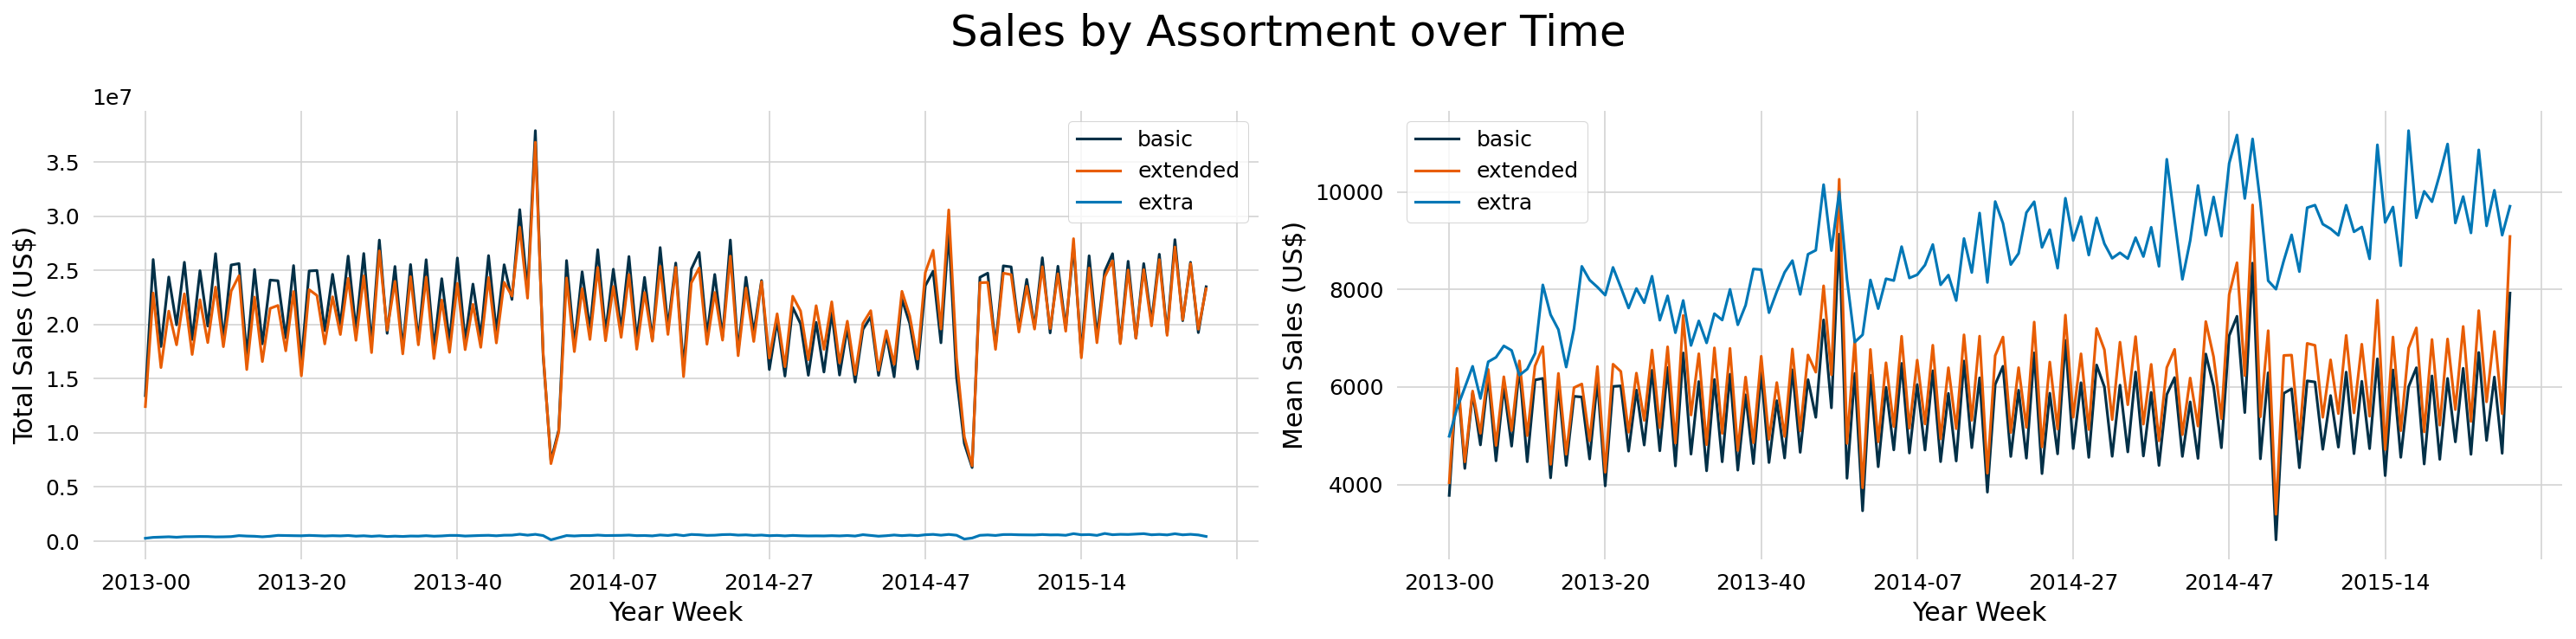

In [14]:
# Data manipulation
df_assort1 = df[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()
df_assort2 = df[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).mean().reset_index()

# Figure
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Sales by Assortment over Time')

# Plot 1
df_assort1.pivot(index='year_week', columns='assortment', values='sales').plot(ax=ax[0])

# Customizing Plot 1
ax[0].legend(title=None)
ax[0].set_xlabel('Year Week', color='black')
ax[0].set_ylabel('Total Sales (US$)', color='black')
ax[0].tick_params(left=False, bottom=False)

# Plot 2
df_assort2.pivot(index='year_week', columns='assortment', values='sales').plot(ax=ax[1])

# Customizing Plot 2
ax[1].legend(title=None)
ax[1].set_xlabel('Year Week', color='black')
ax[1].set_ylabel('Mean Sales (US$)', color='black')
ax[1].tick_params(left=False, bottom=False)

# Adjusting spacing
fig.tight_layout()

### 3.2.2. **H2:** Stores with higher number of nearby competitors are supposed to sell less.

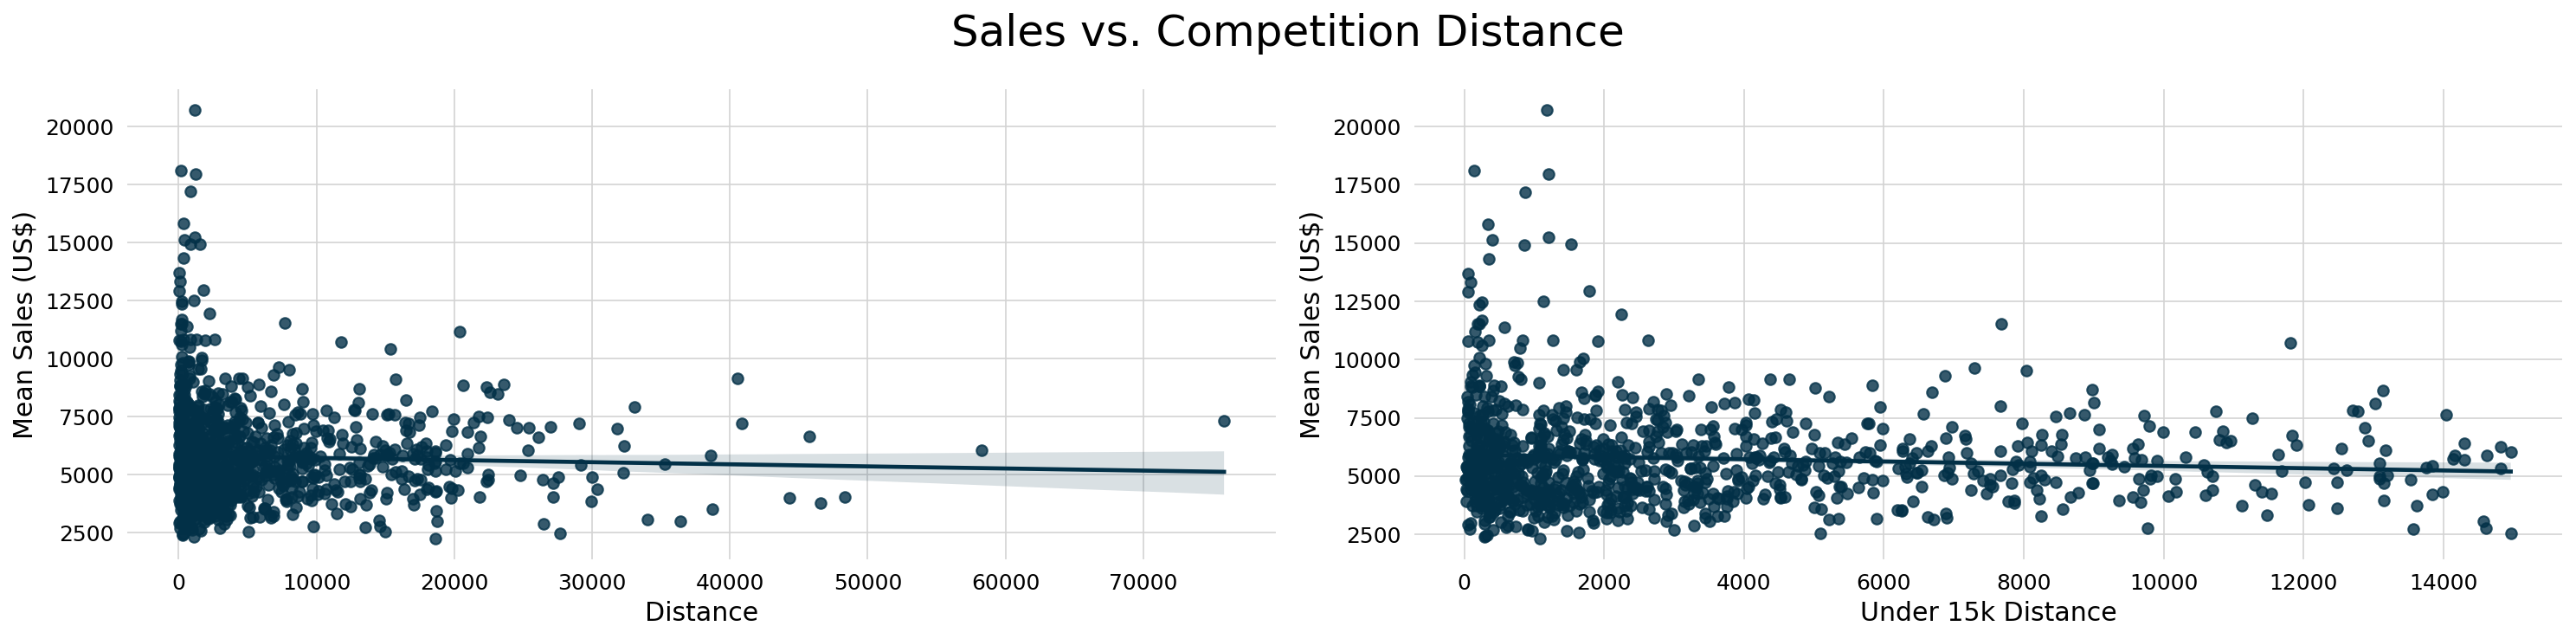

In [15]:
# Data manipulation
# Calculating the mean sales of each store alongside its distance from the competition
aux = df[['store', 'comp_distance', 'sales']].groupby(['store']).mean().reset_index()
aux2 = aux[aux['comp_distance'] < 15000]

# Figure
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Sales vs. Competition Distance')

# Plot 1
plt.subplot(1, 2, 1)
reg(aux, 'comp_distance', 'sales', None, 'Distance', 'Mean Sales (US$)')

# Plot 2
plt.subplot(1, 2, 2)
reg(aux2, 'comp_distance', 'sales', None, 'Under 15k Distance', 'Mean Sales (US$)')

# # Adjusting spacing
fig.tight_layout()

### 3.2.3. **H3:** Stores with competitors for a longer period of time sell more.

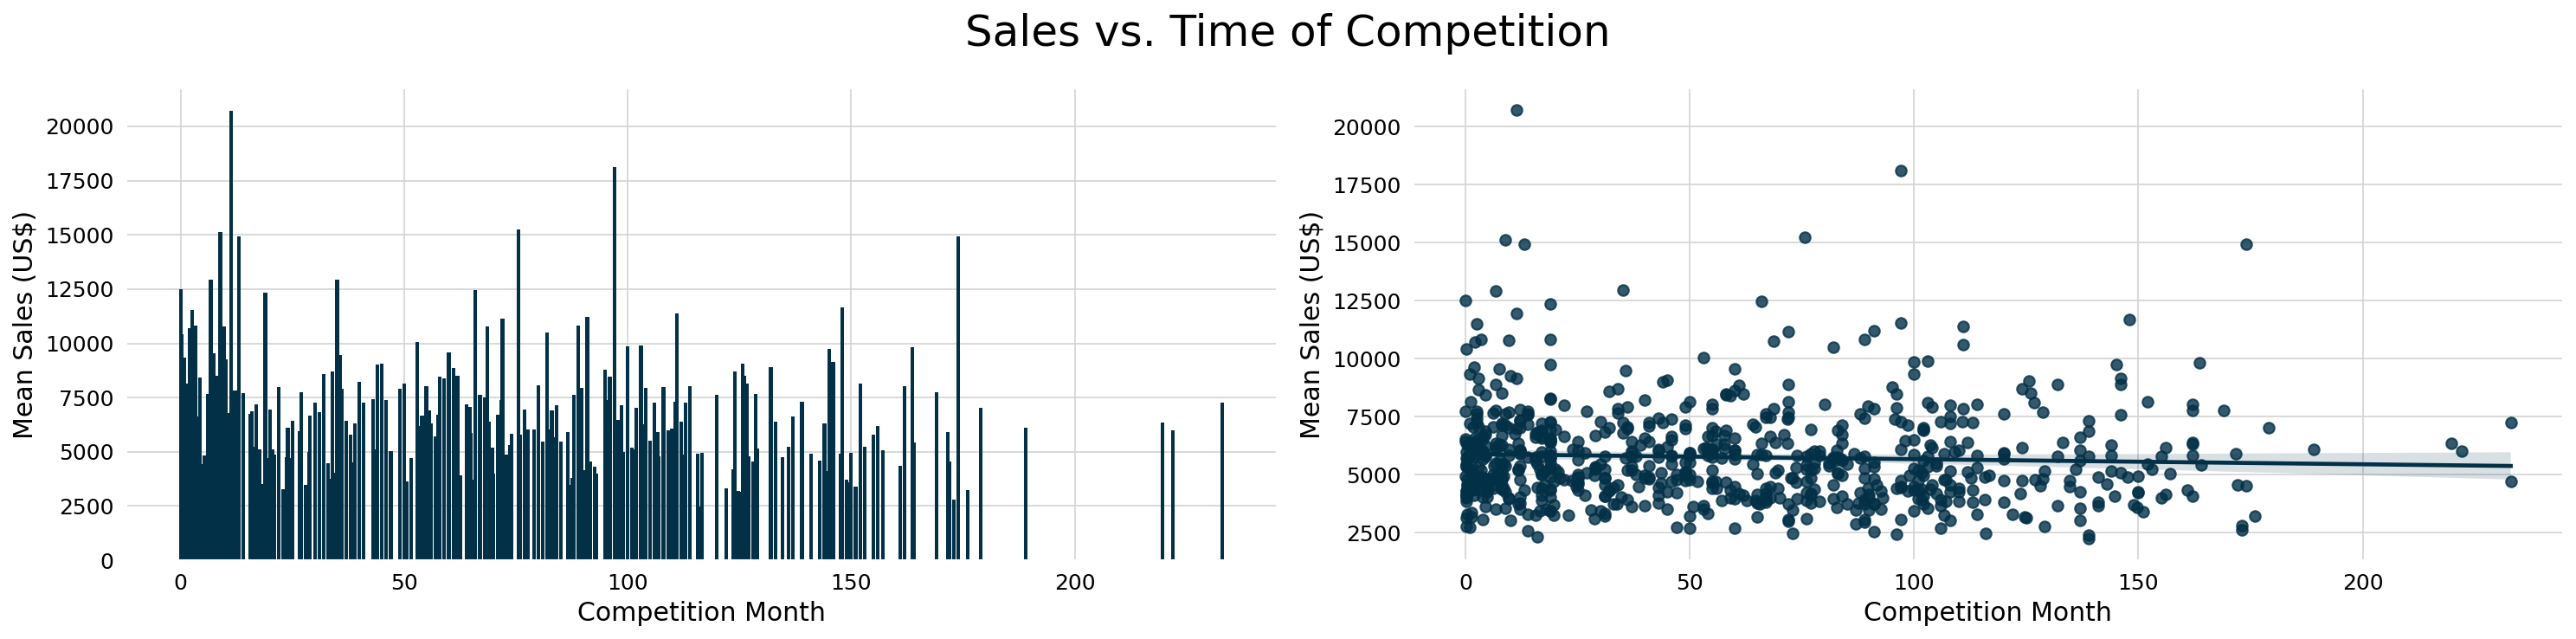

In [16]:
# Creating figure
fig = plt.figure(figsize=(20, 5))

# Setting title for main figure
fig.suptitle('Sales vs. Time of Competition')

# Data manipulation
aux = df[['store', 'comp_time_month', 'sales']].groupby(['store']).mean().reset_index()
aux = aux[(aux['comp_time_month'] > 0) & (aux['comp_time_month'] <= 250)]

# Plot 1
plt.subplot( 1, 2, 1 )
barplot(aux, 'comp_time_month', 'sales', None, 'Competition Month', 'Mean Sales (US$)')

# Plot 2
plt.subplot( 1, 2, 2 )
reg(aux, 'comp_time_month', 'sales', None, 'Competition Month', 'Mean Sales (US$)')

# Adjusting spacing
fig.tight_layout()

### 3.2.4. **H4:** Stores that keep promotions for longer periods are supposed to sell more.

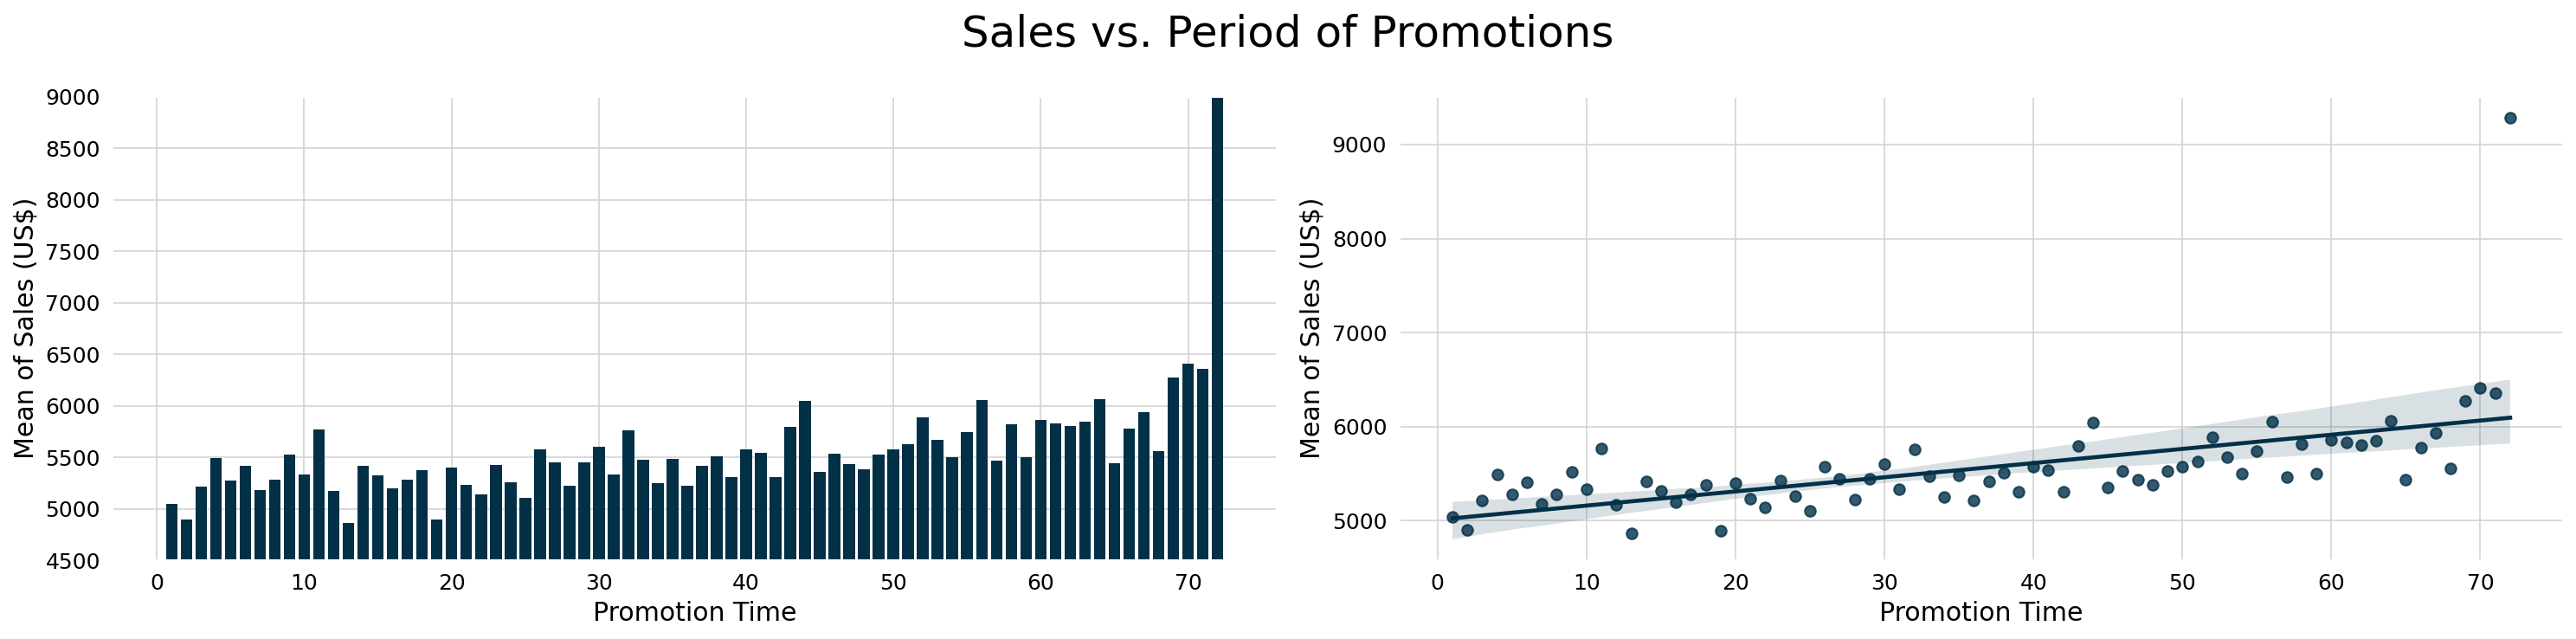

In [17]:
# Creating figure
fig = plt.figure(figsize=(20, 5))

# Setting title for main figure
fig.suptitle('Sales vs. Period of Promotions')

# Data manipulation
aux1 = df[['promo_time_month', 'sales']].groupby(['promo_time_month']).mean().reset_index()
aux2 = aux1[aux1['promo_time_month'] > 0] 

# Plot 1
plt.subplot(1,2,1)
barplot(aux2, 'promo_time_month', 'sales', None, 'Promotion Time', 'Mean of Sales (US$)')
plt.ylim(4500,9000)

plt.subplot(1,2,2)
reg(aux2, 'promo_time_month', 'sales', None, 'Promotion Time', 'Mean of Sales (US$)')

# Adjusting spacing
fig.tight_layout()

### 3.2.5. **H5:** Stores that participate in more consecutive promotions are supposed to sell more.

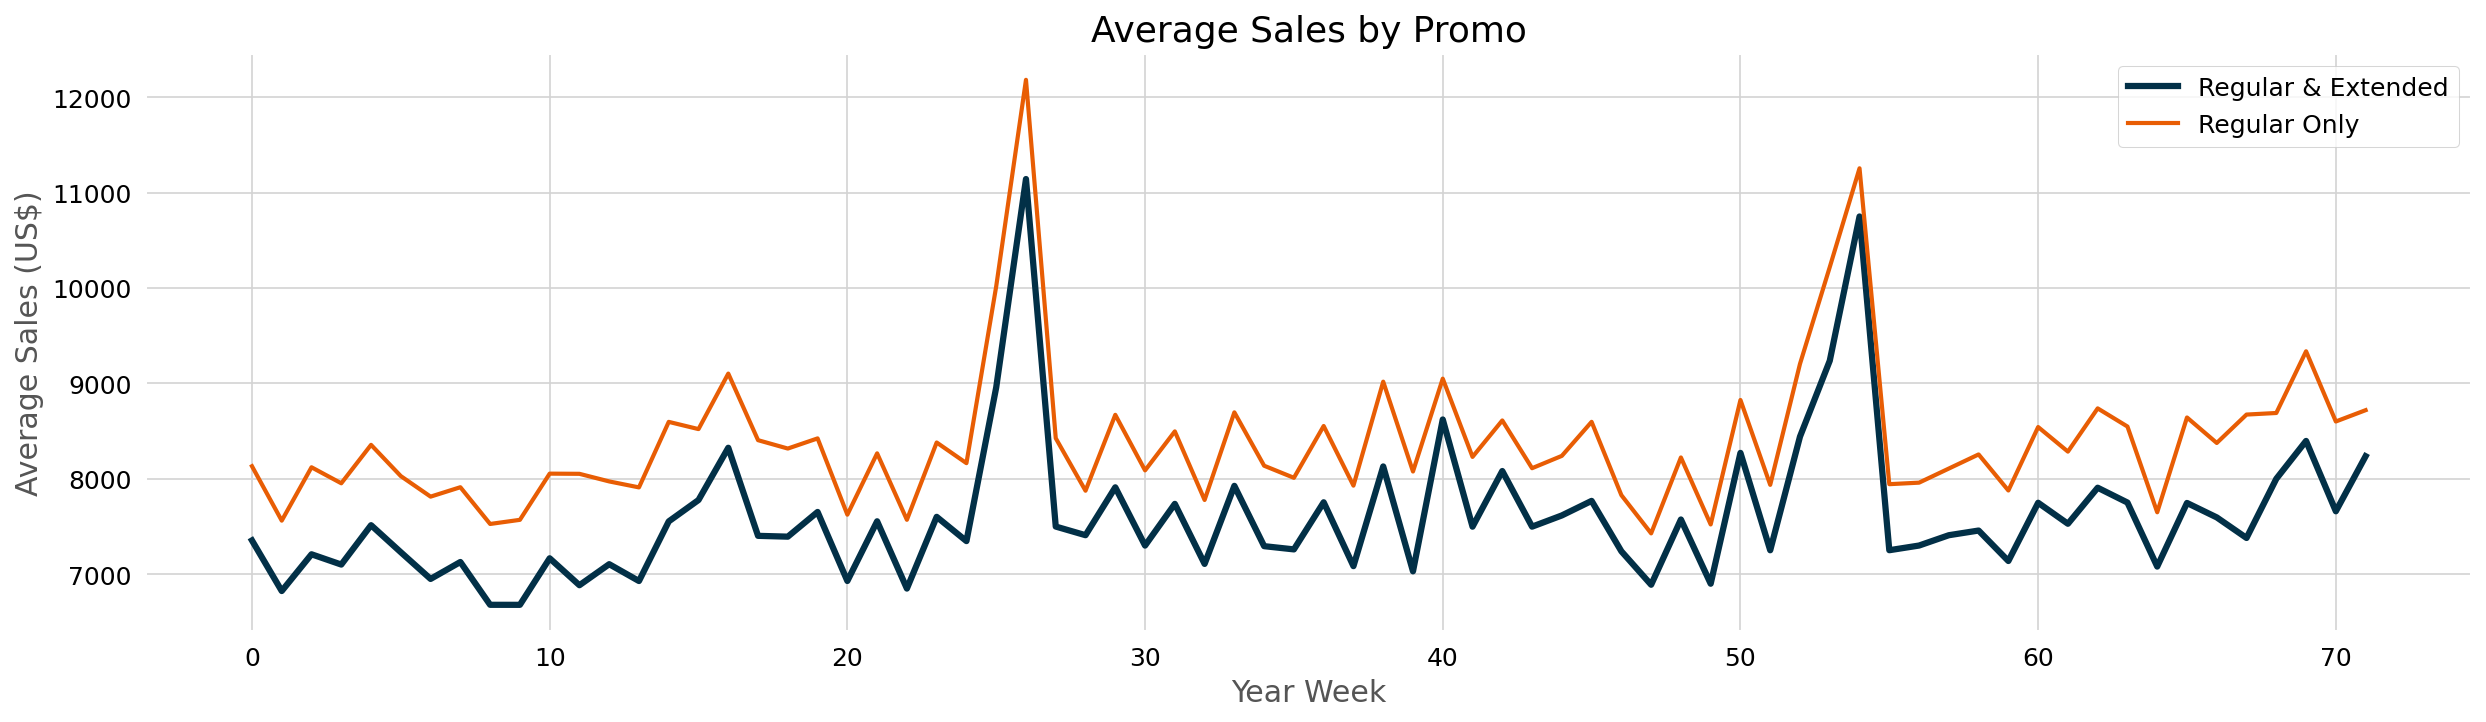

In [18]:
# Data manipulation
aux1 = df[(df['promo'] == 1) & (df['promo2'] == 1)][['year_week','sales']].groupby(['year_week']).mean().reset_index()
aux2 = df[(df['promo'] == 1) & (df['promo2'] == 0)][['year_week','sales']].groupby(['year_week']).mean().reset_index()

# Plot
ax = aux1.plot(linewidth=3)
aux2.plot(ax=ax, linewidth=2)

# Customizing
plt.title('Average Sales by Promo')
plt.xlabel('Year Week')
plt.ylabel('Average Sales (US$)')
plt.tick_params(left=False, bottom=False)
ax.legend(labels=['Regular & Extended', 'Regular Only']);

### 3.2.6. **H6:** Stores open on Christmas sell more than other days on average.

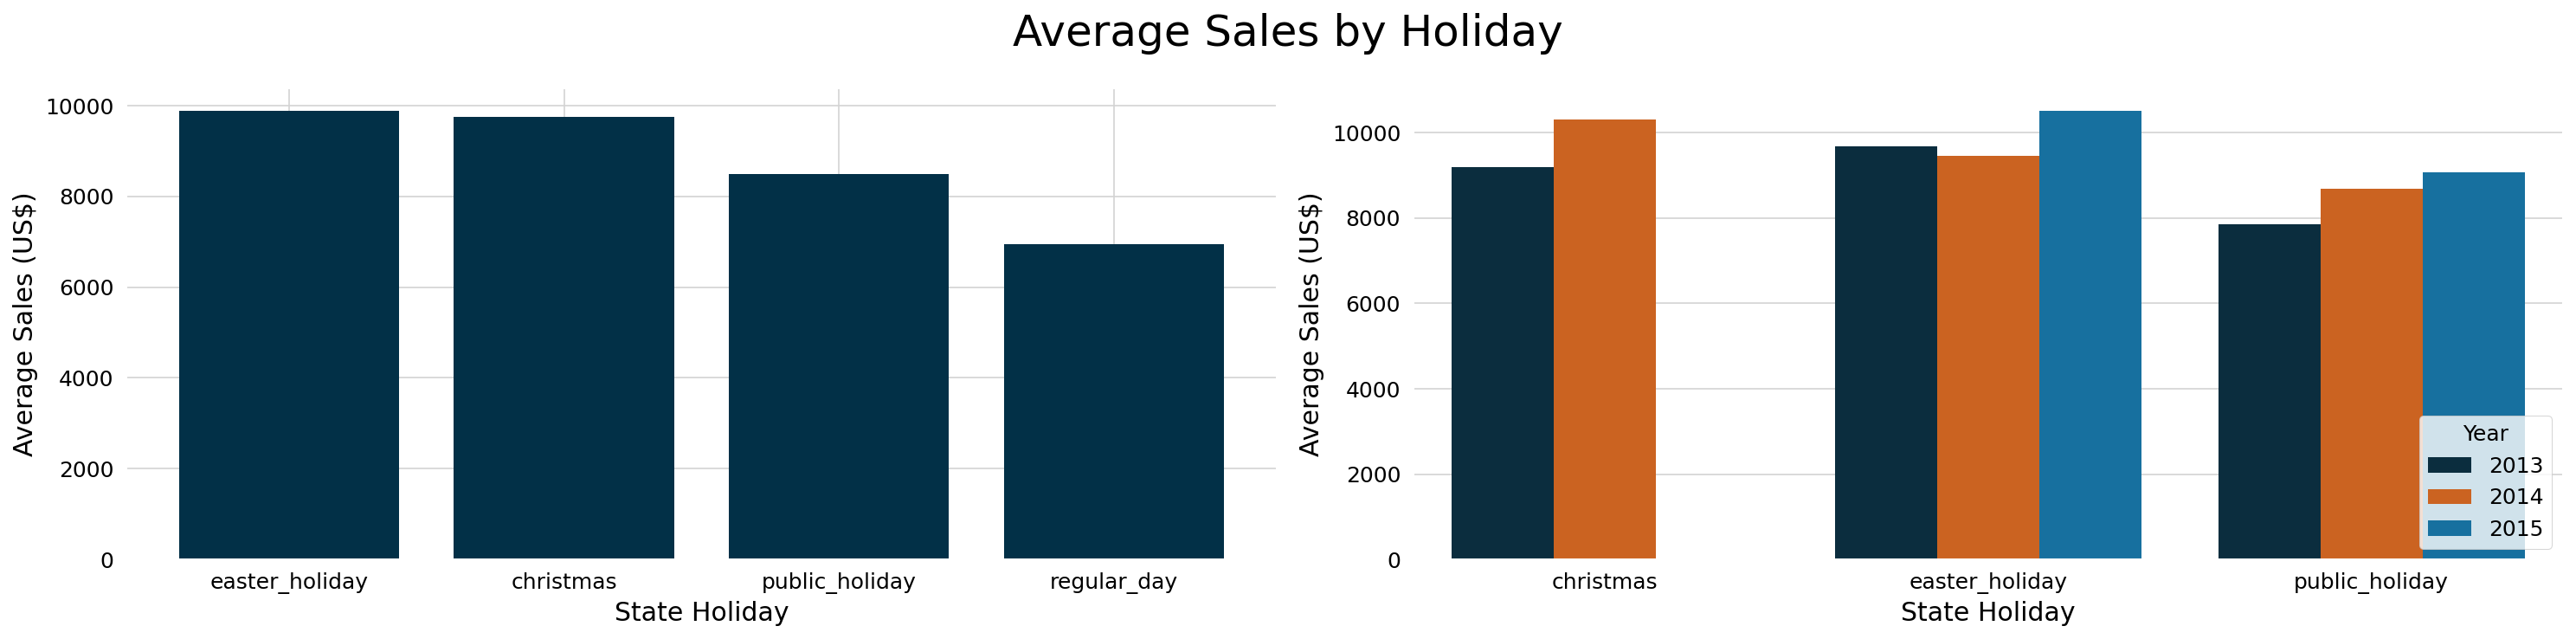

In [19]:
# Figure
fig = plt.figure(figsize=(20, 5))

# Title
fig.suptitle('Average Sales by Holiday')

# Data manipulation
aux = df[df['open'] == 1][['state_holiday', 'sales']]\
    .groupby(['state_holiday']).mean().sort_values('sales', ascending=False).reset_index()

aux2 = df[(df['open'] == 1)&(df['state_holiday']!='regular_day')]\
    [['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).mean().reset_index()

# Plot 1
plt.subplot(1, 2, 1)
barplot(aux, 'state_holiday', 'sales', None, 'State Holiday', 'Average Sales (US$)')

# Plot 2
plt.subplot(1, 2, 2)
bar(aux2, 'state_holiday', 'sales', None, 'State Holiday', 'Average Sales (US$)', hue_feature='year')
plt.legend(title='Year', loc='lower right')

# Settings
plt.tight_layout()

### 3.2.7. **H7:** Stores are supposed to sell more before the 15th day of each month.

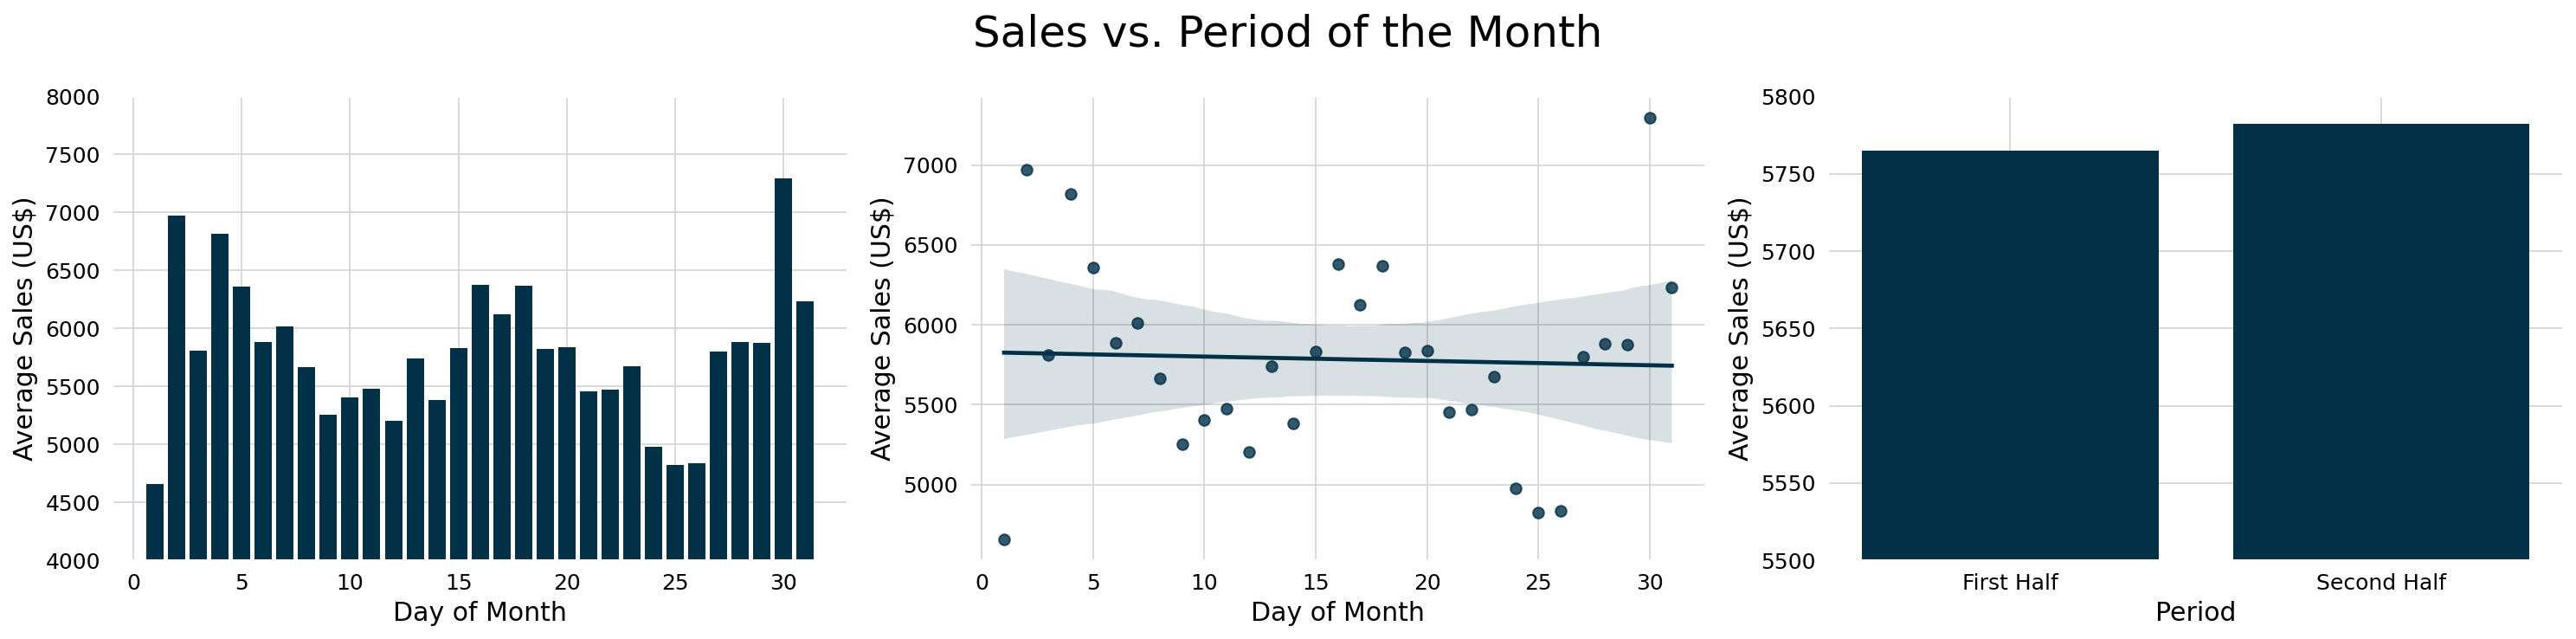

In [20]:
# Creating figure
fig = plt.figure(figsize=(20, 5))

# Setting title for main figure
fig.suptitle('Sales vs. Period of the Month')

# Data manipulation
aux1 = df[df['day']<=15][['sales']].mean()
aux2 = df[df['day']>15][['sales']].mean()
aux3 = pd.DataFrame({'First Half':aux1, 'Second Half':aux2}).T.reset_index().rename({'index':'period'},axis=1) 
aux4 = df[['day','sales']].groupby(['day']).mean().reset_index() 

# Plot 1
plt.subplot(1,3,1)
barplot(aux4, 'day', 'sales', None, 'Day of Month', 'Average Sales (US$)')
plt.ylim(4000,8000)

# Plot 2
plt.subplot(1,3,2)
reg(aux4, 'day', 'sales', None, 'Day of Month', 'Average Sales (US$)')

# Plot 3
plt.subplot(1,3,3)
barplot(aux3, 'period', 'sales', None, 'Period', 'Average Sales (US$)')
plt.ylim(5500,5800)

# Adjusting spacing
fig.tight_layout()

### 3.2.8. **H8:** Stores are supposed to sell less during the weekend on average.

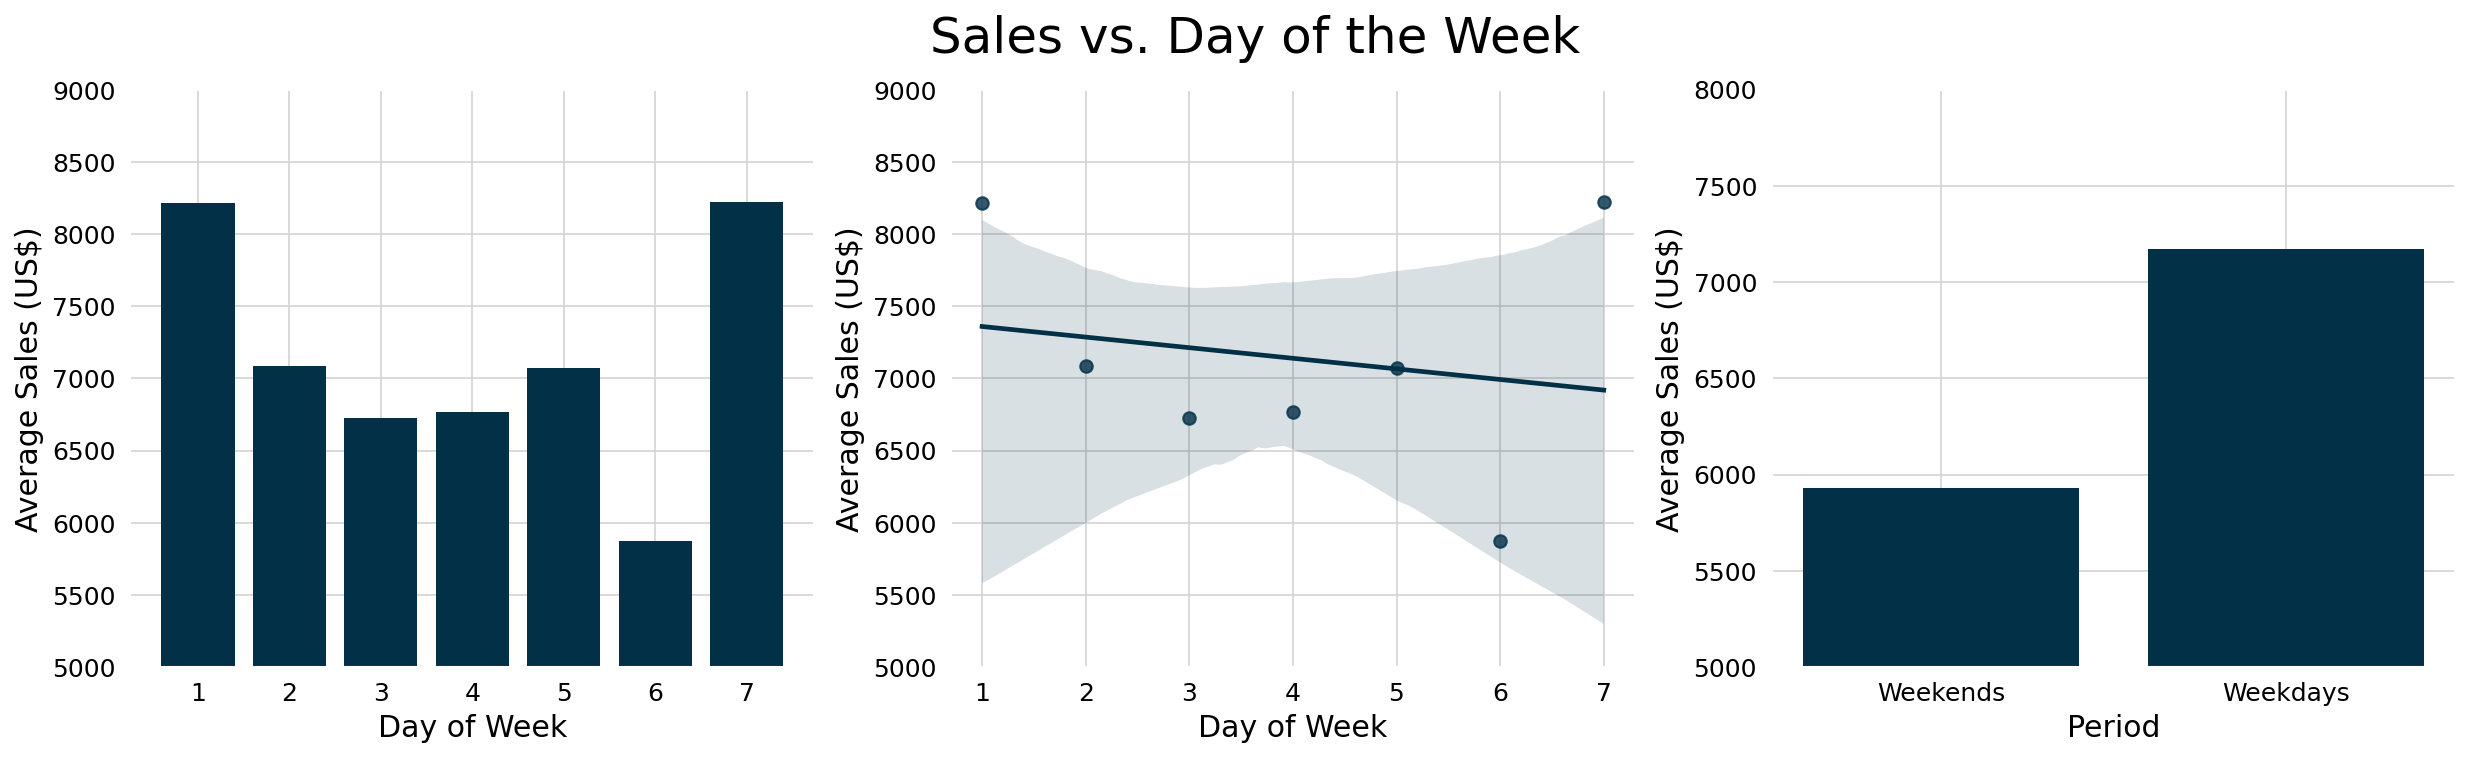

In [21]:
# Creating figure
fig = plt.figure(figsize=(20, 5))

# Setting title for main figure
fig.suptitle('Sales vs. Day of the Week')

# Data manipulation
aux1 = df[df['open'] == 1][['day_of_week','sales']].groupby(['day_of_week']).mean().reset_index()

aux2 = df[df['open'] == 1][['day_of_week','sales']].groupby(df['day_of_week'] <= 5)['sales'].mean().reset_index()
aux2.columns = ['period', 'average_sales']
aux2['period'] = aux2['period'].replace({True: 'Weekdays', False: 'Weekends'})

# Plot 1
plt.subplot(1,3,1)
barplot(aux1, 'day_of_week', 'sales', None, 'Day of Week', 'Average Sales (US$)')
plt.ylim(5000, 9000)

# Plot 2
plt.subplot(1,3,2)
reg(aux1, 'day_of_week', 'sales', None, 'Day of Week', 'Average Sales (US$)')
plt.ylim(5000, 9000)

# Plot 3
plt.subplot(1,3,3)
barplot(aux2, 'period', 'average_sales', None, 'Period', 'Average Sales (US$)')
plt.ylim(5000, 8000);

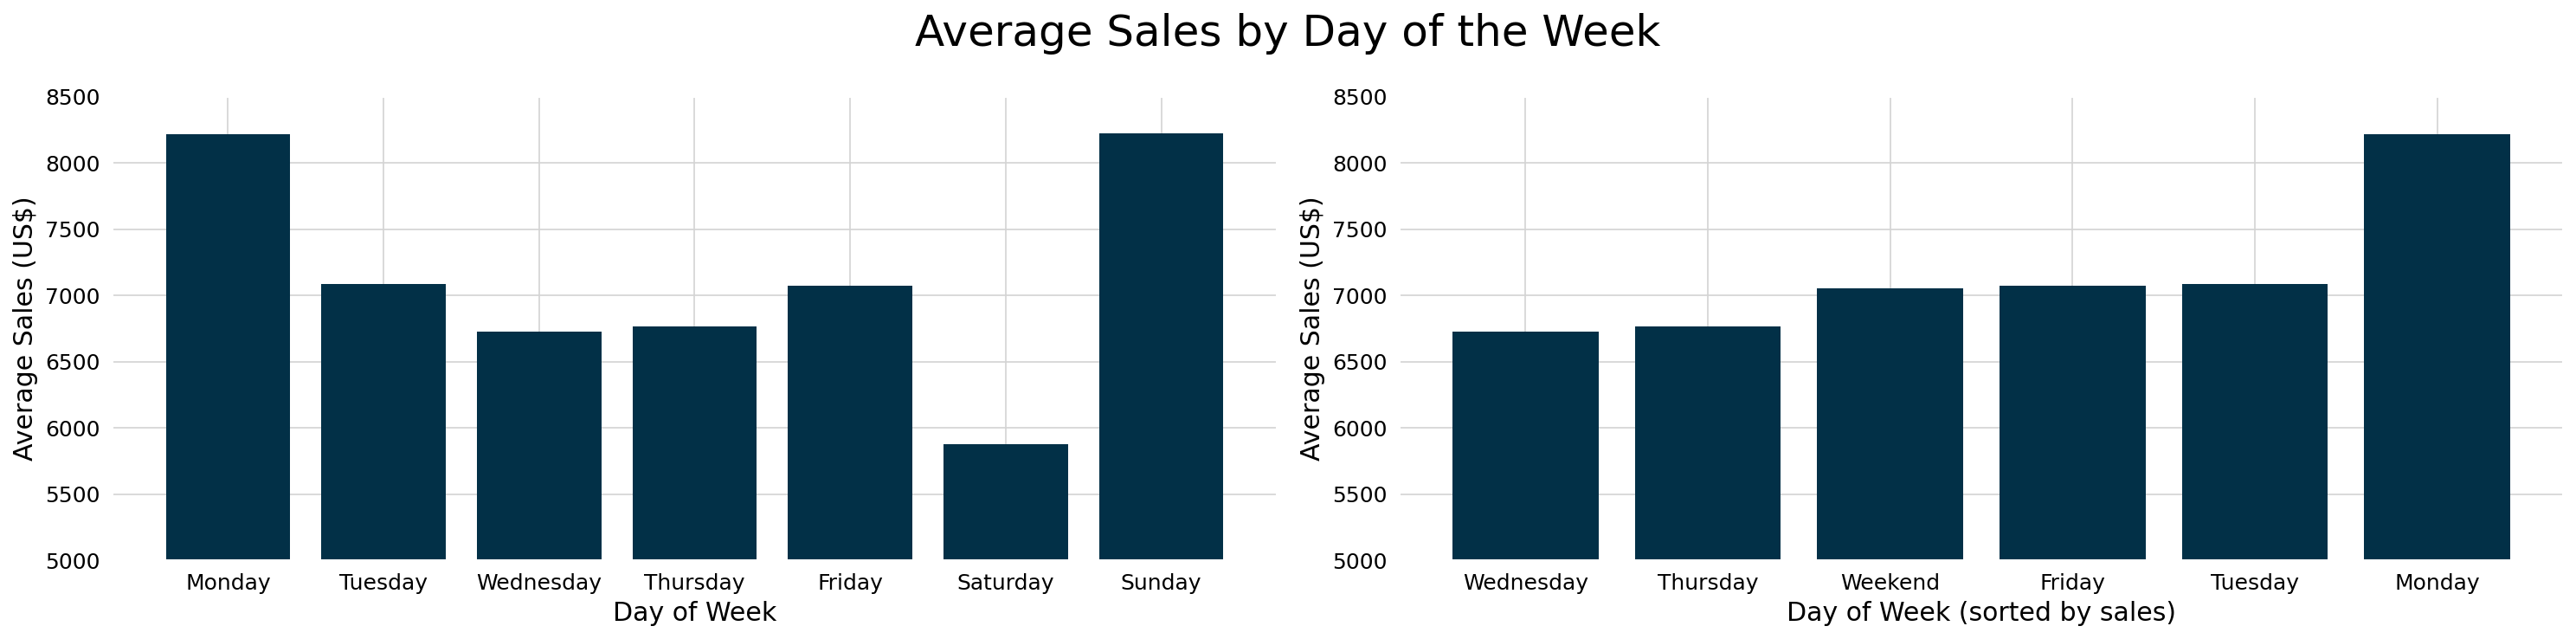

In [22]:
# Figure
fig = plt.figure(figsize=(20, 5))

# Title
fig.suptitle('Average Sales by Day of the Week')

# Data manipulation
aux = df[df['open'] == 1][['day_of_week','sales']].groupby(['day_of_week']).mean().reset_index()
aux['day_of_week'] = aux['day_of_week'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})

aux2=aux.copy()
aux2['day_of_week'] = aux2['day_of_week'].replace({'Saturday': 'Weekend', 'Sunday': 'Weekend'})
aux2 = aux2.groupby('day_of_week', as_index=False)['sales'].mean().sort_values('sales')

# Plot 1
plt.subplot(1, 2, 1)
barplot(aux, 'day_of_week', 'sales', None, 'Day of Week', 'Average Sales (US$)')
plt.ylim(5000, 8500)

# Plot 2
plt.subplot(1, 2, 2)
barplot(aux2, 'day_of_week', 'sales', None, 'Day of Week (sorted by sales)', 'Average Sales (US$)')
plt.ylim(5000, 8500)

# Settings
plt.tight_layout()

### 3.2.9 **H9:** Stores are supposed to sell less during school holidays.

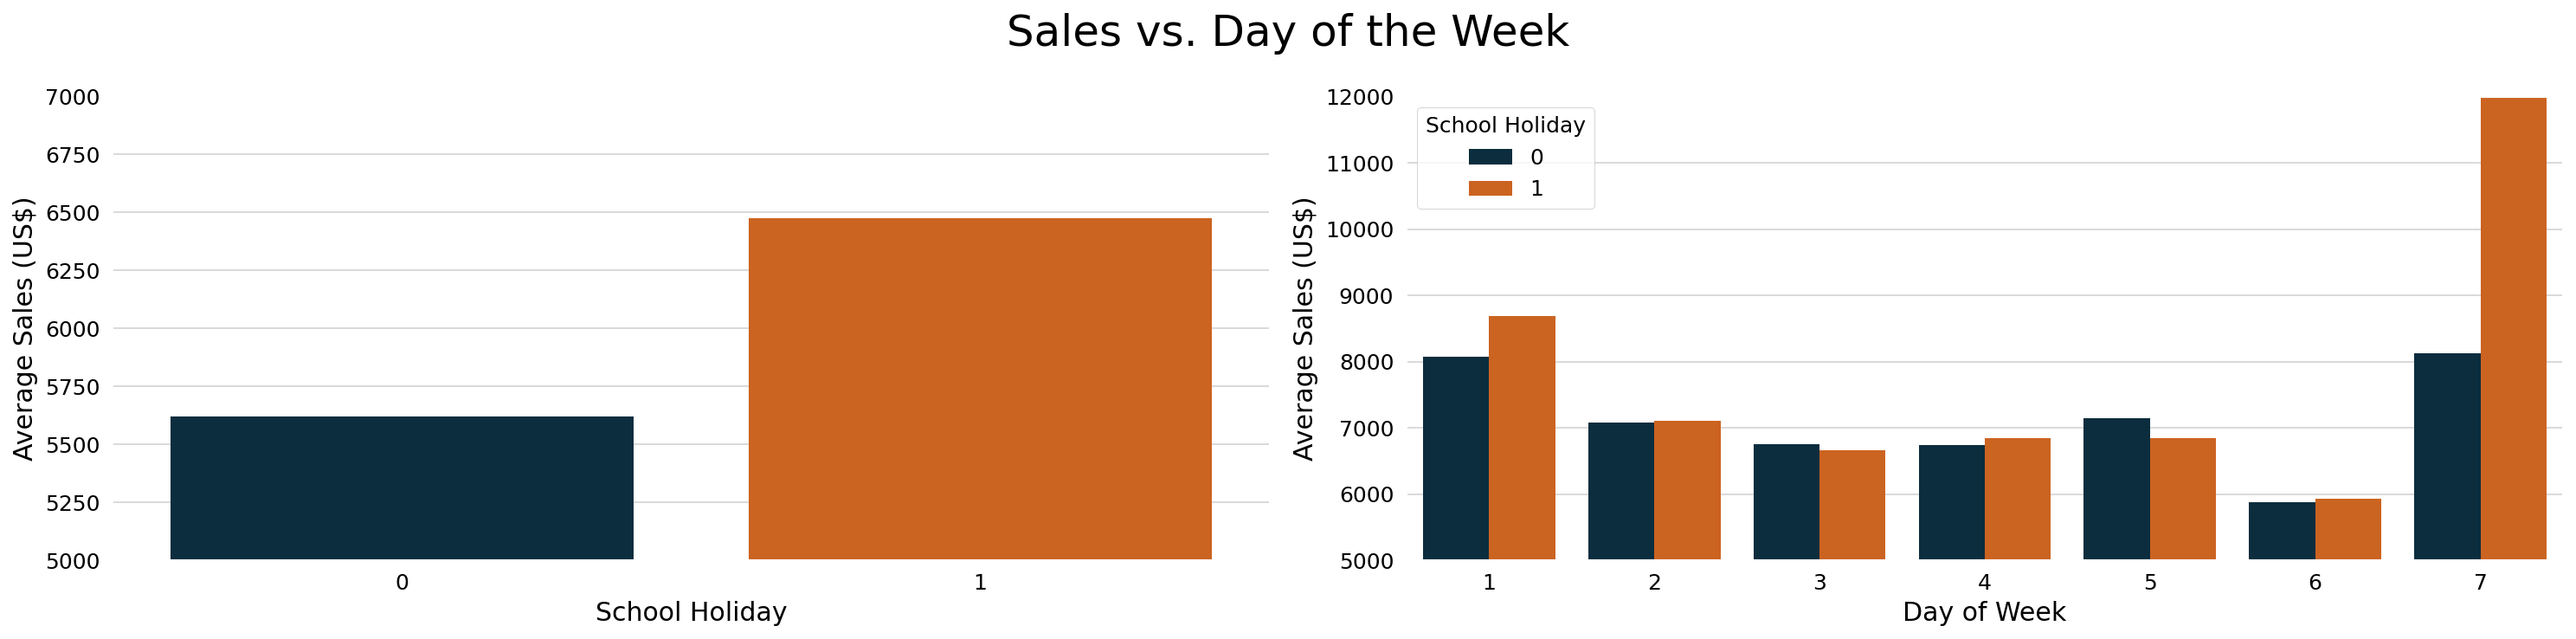

In [23]:
# Creating figure
fig = plt.figure(figsize=(20, 5))

# Setting title for main figure
fig.suptitle('Sales vs. Day of the Week')

# Data manipulation
aux1 = df[['school_holiday', 'sales']].groupby(['school_holiday']).mean().reset_index()
aux2 = df[df['open'] == 1][['day_of_week', 'school_holiday', 'sales']].groupby(['day_of_week','school_holiday']).mean().reset_index()

# Plot 1
plt.subplot(1, 2, 1)
bar(aux1, 'school_holiday', 'sales', None, 'School Holiday', 'Average Sales (US$)')
# Customizing Plot 1
plt.ylim(5000, 7000)

# Plot 2
plt.subplot(1, 2, 2)
bar(aux2, 'day_of_week', 'sales', None, 'Day of Week', 'Average Sales (US$)', hue_feature='school_holiday')
# Customizing Plot 2
plt.legend(title='School Holiday')
plt.ylim(5000, 12000)

# Adjusting spacing
fig.tight_layout()

### 3.2.10. **H10:** Stores sell more through the years and months.

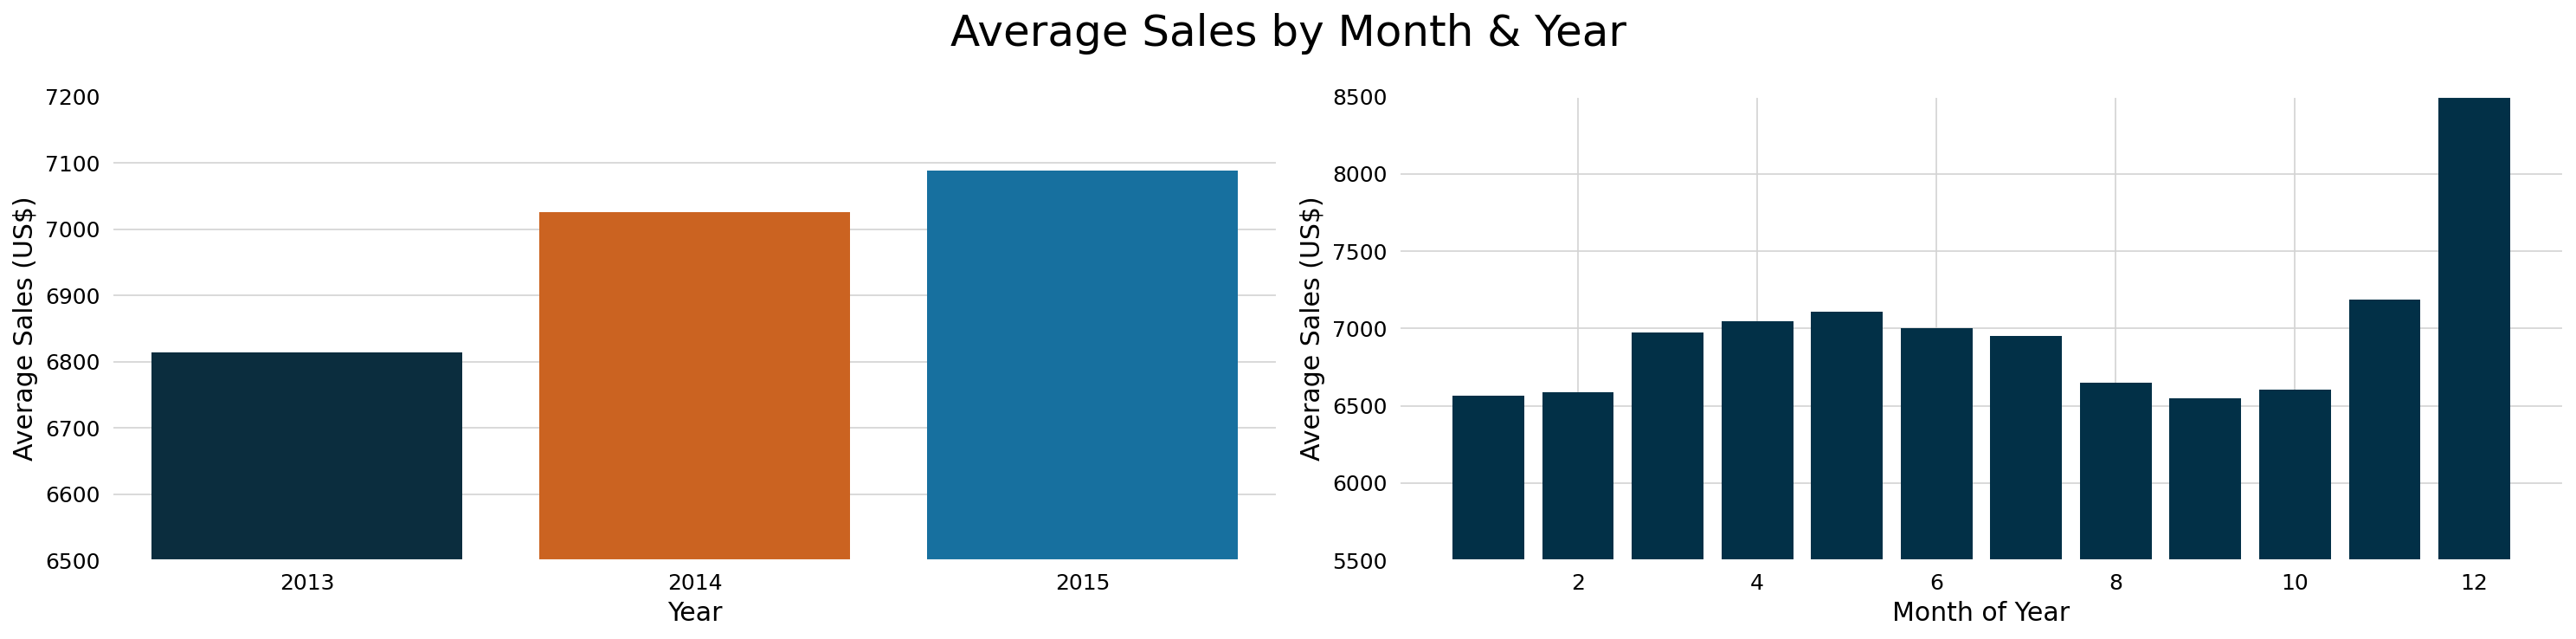

In [24]:
# Figure
fig = plt.figure(figsize=(20, 5))

# Title
fig.suptitle('Average Sales by Month & Year')

# Data manipulation
aux1 = df[df['open'] == 1][['year', 'sales']].groupby(['year']).mean().reset_index()
aux2 = df[df['open'] == 1][['month', 'sales']].groupby(['month']).mean().reset_index()

# Plot 1
plt.subplot(1, 2, 1)
bar(aux1, 'year', 'sales', None, 'Year', 'Average Sales (US$)')
plt.ylim(6500, 7200)

# Plot 2
plt.subplot(1, 2, 2)
barplot(aux2, 'month', 'sales', None, 'Month of Year', 'Average Sales (US$)')
plt.ylim(5500, 8500)

# Adjusting spacing
fig.tight_layout()

### 3.2.11. Final List of Hypotheses

**H1:** Stores with higher assortment level are supposed to sell more.
- There are way more stores with basic (593) and extended (513) level of assortment than extra (9). It is natural that the first two will sell more in quantity (sum of sales), but the extra stores sell more when we look at the mean sales.

**H2:** Stores with higher number of nearby competitors are supposed to sell less.
- The mean sales is slightly higher in stores with nearby competitors. Stores with nearby competitors sell more, not less.

**H3:** Stores with competitors for a longer period of time sell more.
- Stores with competitors for longer period of time sell slightly less.

**H4:** Stores that keep promotions for longer periods are supposed to sell more. 
- Stores that keep promotions for longer periods sell more after a certain period of time.

**H5:** Stores that participate in more consecutive promotions are supposed to sell more.
- Stores that participate in more consecutive promotions sell less, not more.

**H6:** Stores open on Christmas sell more than other days on average.
- The holiday that most sells is Easter. Easter sells more on average than other holidays and regular days. Easter sells more throughout the years as well.
- All holidays sell more than regular days on average.

**H7** Stores are supposed to sell more before the 15th day of each month.
- We can't be sure about which half of the month sells more because the numbers are very close.
- It might sell more on the first half of the month on a certain months, but not all of them.
- Considering the 31 days, the second half sells a little bit more on average.

**H8:** Stores are supposed to sell less during the weekend on average.
- When open, stores sell more on Sunday than any other day.
- Saturday is the least popular day of the week for shopping.
- Considering the two days as a whole, the weekend sell more than Wednesday (least popular weekday) and Thursday only.
- On average, the weekends sell the half of a weekday.

**H9:** Stores are supposed to sell less during school holidays.
- On average, stores sell more during school holidays.

**H10:** Stores sell more through the years and months.
- On average, stores sell more through the years and months.
- The main month for shopping is December, followed by November and May.

## 3.3. Numerical Attributes

In [25]:
# Selecting only numerical variables
num_attributes = df.select_dtypes(exclude=['object', 'datetime', 'timedelta64']).drop(columns=['store'], axis=1)

In [26]:
calculate_statistics(num_attributes)

mean     std     min      Q1  median      Q3      max  \
day_of_week         4.00    2.00    1.00    2.00    4.00    6.00     7.00   
sales            5773.82 3849.93    0.00 3727.00 5744.00 7856.00 41551.00   
customers         633.15  464.41    0.00  405.00  609.00  837.00  7388.00   
open                0.83    0.38    0.00    1.00    1.00    1.00     1.00   
promo               0.38    0.49    0.00    0.00    0.00    1.00     1.00   
school_holiday      0.18    0.38    0.00    0.00    0.00    0.00     1.00   
comp_distance    5430.09 7715.32   20.00  710.00 2330.00 6890.00 75860.00   
promo2              0.50    0.50    0.00    0.00    1.00    1.00     1.00   
year             2013.83    0.78 2013.00 2013.00 2014.00 2014.00  2015.00   
month               5.85    3.33    1.00    3.00    6.00    8.00    12.00   
week               23.62   14.43    1.00   11.00   22.00   35.00    52.00   
day                15.70    8.79    1.00    8.00   16.00   23.00    31.00   
comp_time_month    41.26   54.66    0.00    0.00   16.00   73.00   522.00   
promo_time_month   13.01   18.90    0.00    0.00    0.00   25.00    72.00   

                    range  skewness  kurtosis  
day_of_week          6.00      0.00     -1.25  
sales            41551.00      0.64      1.78  
customers         7388.00      1.60      7.09  
open                 1.00     -1.76      1.09  
promo                1.00      0.49     -1.76  
school_holiday       1.00      1.68      0.82  
comp_distance    75840.00      2.93     13.00  
promo2               1.00     -0.00     -2.00  
year                 2.00      0.30     -1.29  
month               11.00      0.27     -1.02  
week                51.00      0.28     -1.00  
day                 30.00      0.01     -1.19  
comp_time_month    522.00      2.13      9.34  
promo_time_month    72.00      1.23      0.23

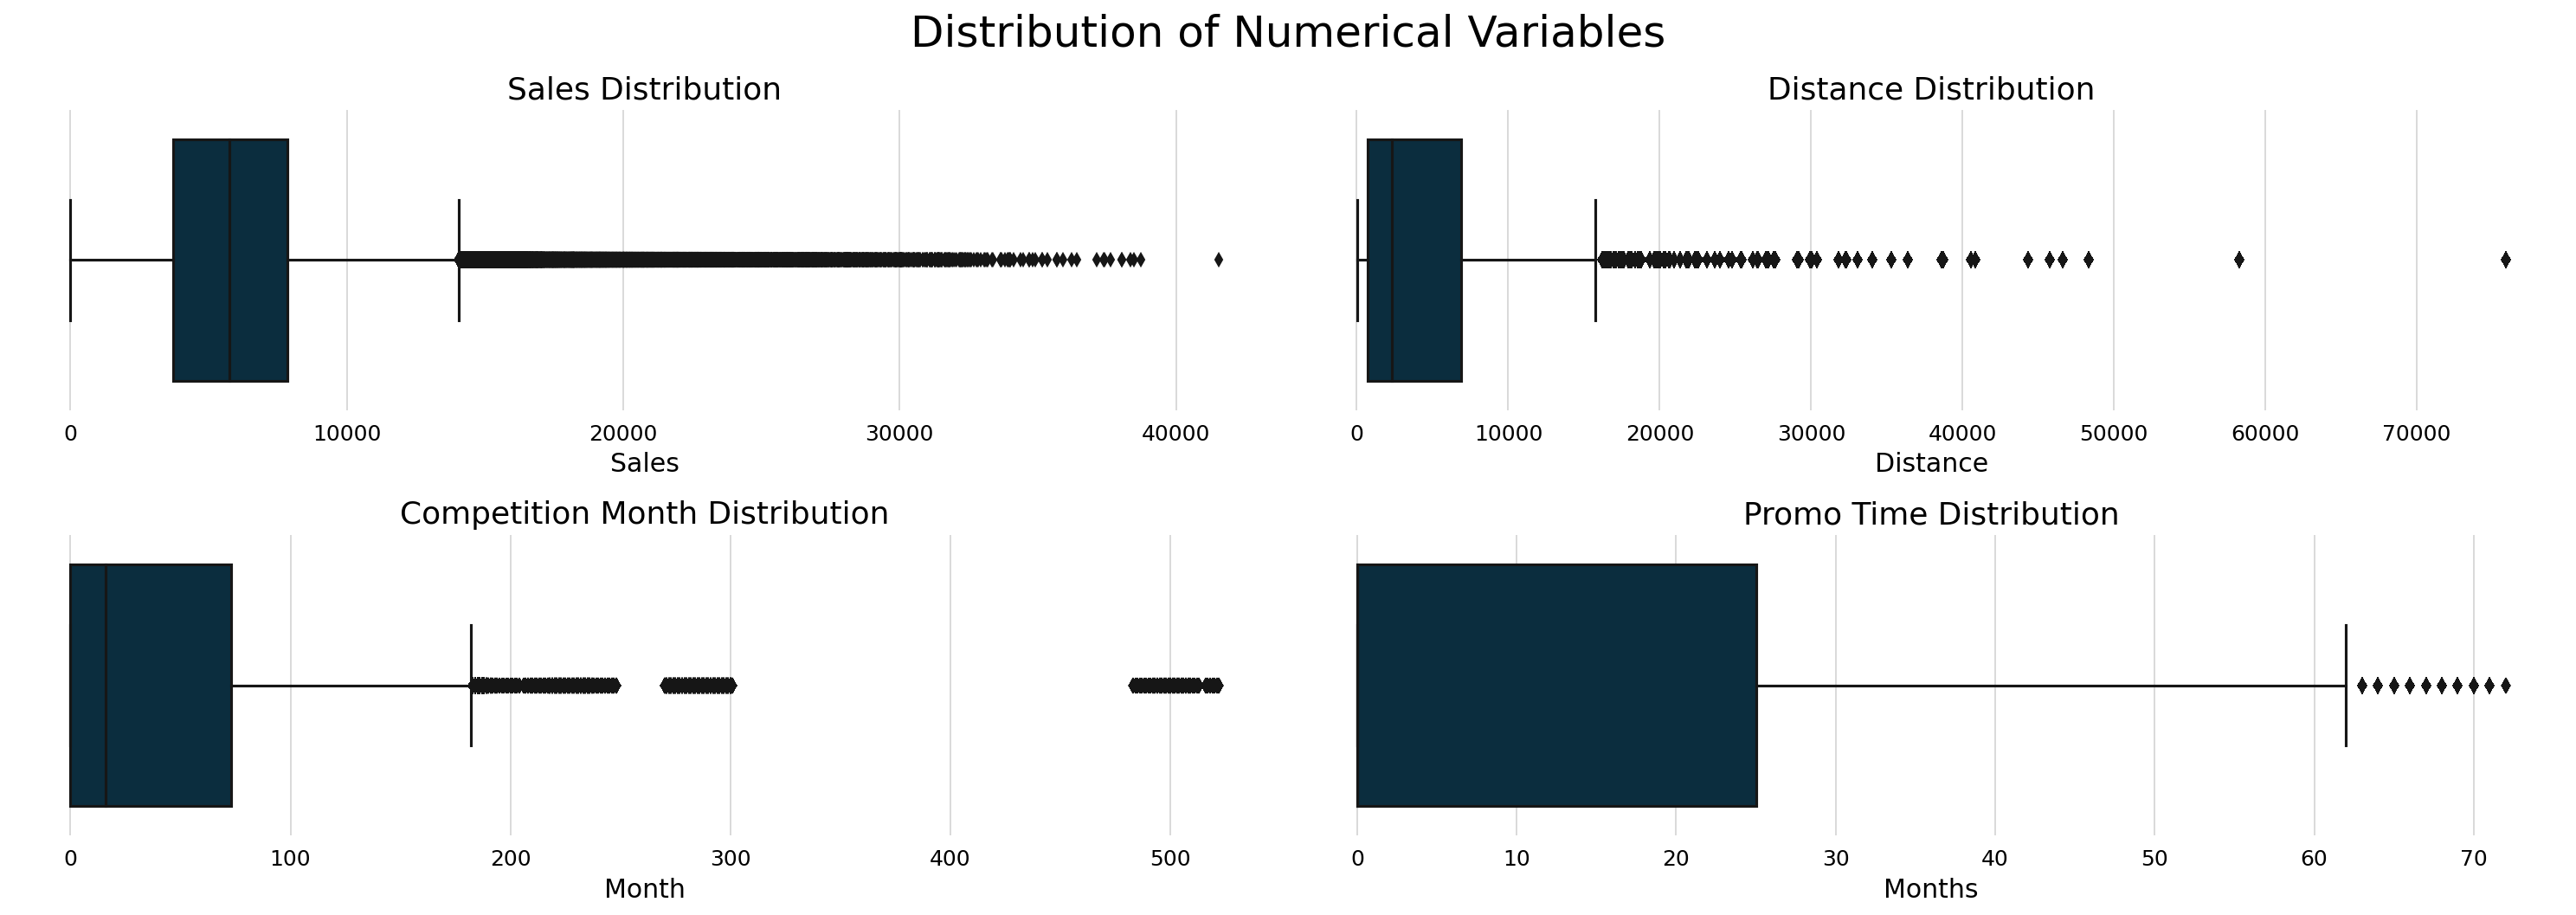

In [27]:
# Figure
fig = plt.figure(figsize=(20,10))

# Title
fig.suptitle('Distribution of Numerical Variables')

# Plots
plt.subplot(3,2,1)
box(df, 'sales', None, 'Sales Distribution', 'Sales')
plt.subplot(3,2,2)
box(df, 'comp_distance', None, 'Distance Distribution', 'Distance')
plt.subplot(3,2,3)
box(df, 'comp_time_month', None, 'Competition Month Distribution', 'Month')
plt.subplot(3,2,4)
box(df, 'promo_time_month', None, 'Promo Time Distribution', 'Months')

# Adjusting spacing
fig.tight_layout()

## 3.4. Correlation 

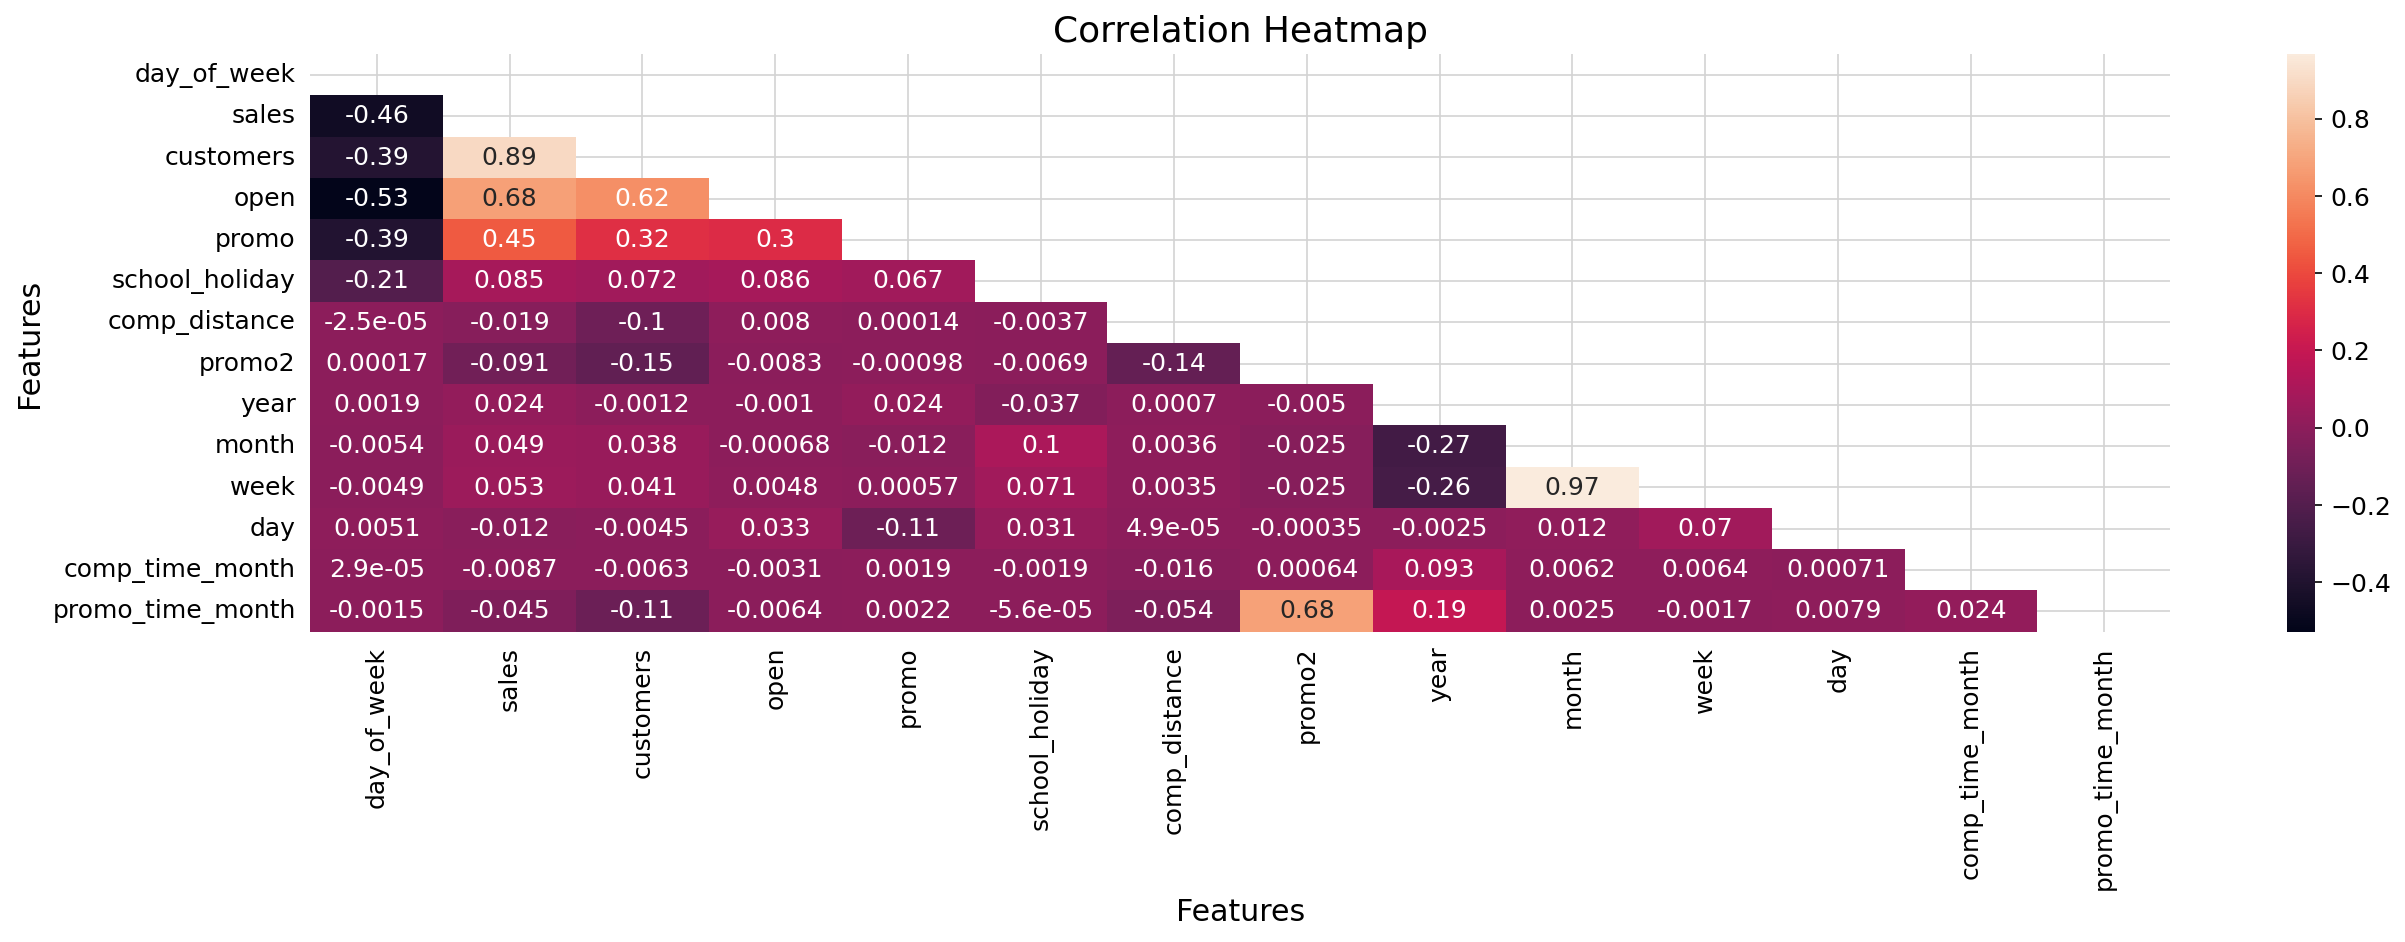

In [28]:
# Calculating the correlation
correlation = num_attributes.corr(method='pearson')

# Plot
fig = sns.heatmap(correlation, annot=True, mask= np.triu(correlation))

# Settings
set_image(fig, 'Correlation Heatmap', 'Features', 'Features', 90);